In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, label_binarize, MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer, precision_score, recall_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from scipy import stats

# Loading of the football dataset from:

https://www.kaggle.com/datasets/aj7amigo/english-premier-league-data-2009-2019

In [2]:
# Create an empty football_df
football_df = pd.DataFrame()

# Store the football csv into the football_df
football_df = pd.read_csv("Epl.csv")

# display the football_df
football_df # 3800 x 23

,Div,Date,HomeTeam,AwayTeam,GoalScored,GoalConceded,Result,HTGS,HTGC,HTResult,...,HomeSoT,AwaySoT,HomeFoul,AwayFoul,HomeCorner,AwayCorner,HomeYellow,AwayYellow,HomeRed,AwayRed
0,E0,8/15/2009 0:00,Aston Villa,Wigan,0,2,A,0,1,A,...,5,7,15,14,4,6,2,2,0,0
1,E0,8/15/2009 0:00,Blackburn,Man City,0,2,A,0,1,A,...,9,5,12,9,5,4,2,1,0,0
2,E0,8/15/2009 0:00,Bolton,Sunderland,0,1,A,0,1,A,...,3,13,16,10,4,7,2,1,0,0
3,E0,8/15/2009 0:00,Chelsea,Hull,2,1,H,1,1,D,...,12,3,13,15,12,4,1,2,0,0
4,E0,8/15/2009 0:00,Everton,Arsenal,1,6,A,0,3,A,...,5,9,11,13,4,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,E0,5/12/2019 0:00,Liverpool,Wolves,2,0,H,1,0,H,...,5,2,3,11,4,1,0,2,0,0
3796,E0,5/12/2019 0:00,Man United,Cardiff,0,2,A,0,1,A,...,10,4,9,6,11,2,3,3,0,0
3797,E0,5/12/2019 0:00,Southampton,Huddersfield,1,1,D,1,0,H,...,3,3,8,6,4,3,0,1,0,0
3798,E0,5/12/2019 0:00,Tottenham,Everton,2,2,D,1,0,H,...,3,9,10,13,7,4,0,2,0,0


## Exploratory Data Analysis (EDA)

In [3]:
# See the number of rows and columns
football_df.shape

(3800, 23)

In [4]:
# Summary of the dataset
football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Div           3800 non-null   object
 1   Date          3800 non-null   object
 2   HomeTeam      3800 non-null   object
 3   AwayTeam      3800 non-null   object
 4   GoalScored    3800 non-null   int64 
 5   GoalConceded  3800 non-null   int64 
 6   Result        3800 non-null   object
 7   HTGS          3800 non-null   int64 
 8   HTGC          3800 non-null   int64 
 9   HTResult      3800 non-null   object
 10  Referee       3800 non-null   object
 11  HomeShot      3800 non-null   int64 
 12  AwayShot      3800 non-null   int64 
 13  HomeSoT       3800 non-null   int64 
 14  AwaySoT       3800 non-null   int64 
 15  HomeFoul      3800 non-null   int64 
 16  AwayFoul      3800 non-null   int64 
 17  HomeCorner    3800 non-null   int64 
 18  AwayCorner    3800 non-null   int64 
 19  HomeYe

In [5]:
# show the first few rows of the dataset
football_df.head()

,Div,Date,HomeTeam,AwayTeam,GoalScored,GoalConceded,Result,HTGS,HTGC,HTResult,...,HomeSoT,AwaySoT,HomeFoul,AwayFoul,HomeCorner,AwayCorner,HomeYellow,AwayYellow,HomeRed,AwayRed
0,E0,8/15/2009 0:00,Aston Villa,Wigan,0,2,A,0,1,A,...,5,7,15,14,4,6,2,2,0,0
1,E0,8/15/2009 0:00,Blackburn,Man City,0,2,A,0,1,A,...,9,5,12,9,5,4,2,1,0,0
2,E0,8/15/2009 0:00,Bolton,Sunderland,0,1,A,0,1,A,...,3,13,16,10,4,7,2,1,0,0
3,E0,8/15/2009 0:00,Chelsea,Hull,2,1,H,1,1,D,...,12,3,13,15,12,4,1,2,0,0
4,E0,8/15/2009 0:00,Everton,Arsenal,1,6,A,0,3,A,...,5,9,11,13,4,9,0,0,0,0


In [6]:
# show the last few rows of the dataset
football_df.tail()

,Div,Date,HomeTeam,AwayTeam,GoalScored,GoalConceded,Result,HTGS,HTGC,HTResult,...,HomeSoT,AwaySoT,HomeFoul,AwayFoul,HomeCorner,AwayCorner,HomeYellow,AwayYellow,HomeRed,AwayRed
3795,E0,5/12/2019 0:00,Liverpool,Wolves,2,0,H,1,0,H,...,5,2,3,11,4,1,0,2,0,0
3796,E0,5/12/2019 0:00,Man United,Cardiff,0,2,A,0,1,A,...,10,4,9,6,11,2,3,3,0,0
3797,E0,5/12/2019 0:00,Southampton,Huddersfield,1,1,D,1,0,H,...,3,3,8,6,4,3,0,1,0,0
3798,E0,5/12/2019 0:00,Tottenham,Everton,2,2,D,1,0,H,...,3,9,10,13,7,4,0,2,0,0
3799,E0,5/12/2019 0:00,Watford,West Ham,1,4,A,0,2,A,...,8,9,10,10,7,2,1,0,1,0


In [7]:
# show the descriptive statistics of the dataset - for numerical variables only
football_df.describe()

,GoalScored,GoalConceded,HTGS,HTGC,HomeShot,AwayShot,HomeSoT,AwaySoT,HomeFoul,AwayFoul,HomeCorner,AwayCorner,HomeYellow,AwayYellow,HomeRed,AwayRed
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,1.570526,1.180000,0.691579,0.522368,14.181842,11.229474,6.014474,4.764211,10.618684,11.133947,6.028684,4.774474,1.478421,1.771316,0.059474,0.087105
std,1.322363,1.160788,0.838739,0.735319,5.514473,4.686764,3.443761,2.891598,3.397368,3.580563,3.132163,2.737614,1.198647,1.284515,0.244206,0.294804
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,3.000000,8.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,11.000000,11.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,13.000000,13.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,7.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,24.000000,26.000000,19.000000,19.000000,7.000000,9.000000,2.000000,2.000000


In [8]:
# Descriptive statistics for categorical Datatypes
football_df.describe(include=['object'])

,Div,Date,HomeTeam,AwayTeam,Result,HTResult,Referee
count,3800,3800,3800,3800,3800,3800,3800
unique,1,1026,36,36,3,3,30
top,E0,5/12/2019 0:00,Arsenal,Everton,H,D,M Dean
freq,3800,10,190,190,1758,1561,291


In [9]:
# See the number of unique values for each variable
football_df.nunique()

Div                1
Date            1026
HomeTeam          36
AwayTeam          36
GoalScored        10
GoalConceded       8
Result             3
HTGS               6
HTGC               6
HTResult           3
Referee           30
HomeShot          40
AwayShot          31
HomeSoT           23
AwaySoT           21
HomeFoul          24
AwayFoul          25
HomeCorner        20
AwayCorner        19
HomeYellow         8
AwayYellow        10
HomeRed            3
AwayRed            3
dtype: int64

## Data Cleaning

In [10]:
# Find the number of NA's
football_df.isnull().sum() # in this case there are no NA's in the dataset

Div             0
Date            0
HomeTeam        0
AwayTeam        0
GoalScored      0
GoalConceded    0
Result          0
HTGS            0
HTGC            0
HTResult        0
Referee         0
HomeShot        0
AwayShot        0
HomeSoT         0
AwaySoT         0
HomeFoul        0
AwayFoul        0
HomeCorner      0
AwayCorner      0
HomeYellow      0
AwayYellow      0
HomeRed         0
AwayRed         0
dtype: int64

In [11]:
# change Date into DateTime format and create a separate column for Year
football_df['Date'] = pd.to_datetime(football_df['Date'])
print(football_df['Date'])

football_df['Year'] = football_df['Date'].dt.year
print(football_df['Year']) # ensure a new column 'Year' has the expected value

0      2009-08-15
1      2009-08-15
2      2009-08-15
3      2009-08-15
4      2009-08-15
          ...    
3795   2019-05-12
3796   2019-05-12
3797   2019-05-12
3798   2019-05-12
3799   2019-05-12
Name: Date, Length: 3800, dtype: datetime64[ns]
0       2009
1       2009
2       2009
3       2009
4       2009
        ... 
3795    2019
3796    2019
3797    2019
3798    2019
3799    2019
Name: Year, Length: 3800, dtype: int32


In [12]:
football_df = football_df.drop(['Div', 'Date'], axis = 1) # div is all the same results, date is not important as we have Year
football_df

,HomeTeam,AwayTeam,GoalScored,GoalConceded,Result,HTGS,HTGC,HTResult,Referee,HomeShot,...,AwaySoT,HomeFoul,AwayFoul,HomeCorner,AwayCorner,HomeYellow,AwayYellow,HomeRed,AwayRed,Year
0,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,11,...,7,15,14,4,6,2,2,0,0,2009
1,Blackburn,Man City,0,2,A,0,1,A,M Dean,17,...,5,12,9,5,4,2,1,0,0,2009
2,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,11,...,13,16,10,4,7,2,1,0,0,2009
3,Chelsea,Hull,2,1,H,1,1,D,A Wiley,26,...,3,13,15,12,4,1,2,0,0,2009
4,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,...,9,11,13,4,9,0,0,0,0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,Liverpool,Wolves,2,0,H,1,0,H,M Atkinson,13,...,2,3,11,4,1,0,2,0,0,2019
3796,Man United,Cardiff,0,2,A,0,1,A,J Moss,26,...,4,9,6,11,2,3,3,0,0,2019
3797,Southampton,Huddersfield,1,1,D,1,0,H,L Probert,10,...,3,8,6,4,3,0,1,0,0,2019
3798,Tottenham,Everton,2,2,D,1,0,H,A Marriner,11,...,9,10,13,7,4,0,2,0,0,2019


In [13]:
# Remove all away team features
football_home = football_df.drop(['AwayTeam', 'AwayShot', 'AwaySoT', 'AwayFoul', 'AwayCorner', 'AwayYellow', 'AwayRed'], axis = 1) # drop Div as it is the same for all rows and Date
football_home

,HomeTeam,GoalScored,GoalConceded,Result,HTGS,HTGC,HTResult,Referee,HomeShot,HomeSoT,HomeFoul,HomeCorner,HomeYellow,HomeRed,Year
0,Aston Villa,0,2,A,0,1,A,M Clattenburg,11,5,15,4,2,0,2009
1,Blackburn,0,2,A,0,1,A,M Dean,17,9,12,5,2,0,2009
2,Bolton,0,1,A,0,1,A,A Marriner,11,3,16,4,2,0,2009
3,Chelsea,2,1,H,1,1,D,A Wiley,26,12,13,12,1,0,2009
4,Everton,1,6,A,0,3,A,M Halsey,8,5,11,4,0,0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,Liverpool,2,0,H,1,0,H,M Atkinson,13,5,3,4,0,0,2019
3796,Man United,0,2,A,0,1,A,J Moss,26,10,9,11,3,0,2019
3797,Southampton,1,1,D,1,0,H,L Probert,10,3,8,4,0,0,2019
3798,Tottenham,2,2,D,1,0,H,A Marriner,11,3,10,7,0,0,2019


In [15]:
# Create an empty df to store the numerical variables
numerical_df = pd.DataFrame()

# Store the numerical variables from football_df here
numerical_df = football_home.select_dtypes(include = np.number)

numerical_df

,GoalScored,GoalConceded,HTGS,HTGC,HomeShot,HomeSoT,HomeFoul,HomeCorner,HomeYellow,HomeRed,Year
0,0,2,0,1,11,5,15,4,2,0,2009
1,0,2,0,1,17,9,12,5,2,0,2009
2,0,1,0,1,11,3,16,4,2,0,2009
3,2,1,1,1,26,12,13,12,1,0,2009
4,1,6,0,3,8,5,11,4,0,0,2009
...,...,...,...,...,...,...,...,...,...,...,...
3795,2,0,1,0,13,5,3,4,0,0,2019
3796,0,2,0,1,26,10,9,11,3,0,2019
3797,1,1,1,0,10,3,8,4,0,0,2019
3798,2,2,1,0,11,3,10,7,0,0,2019


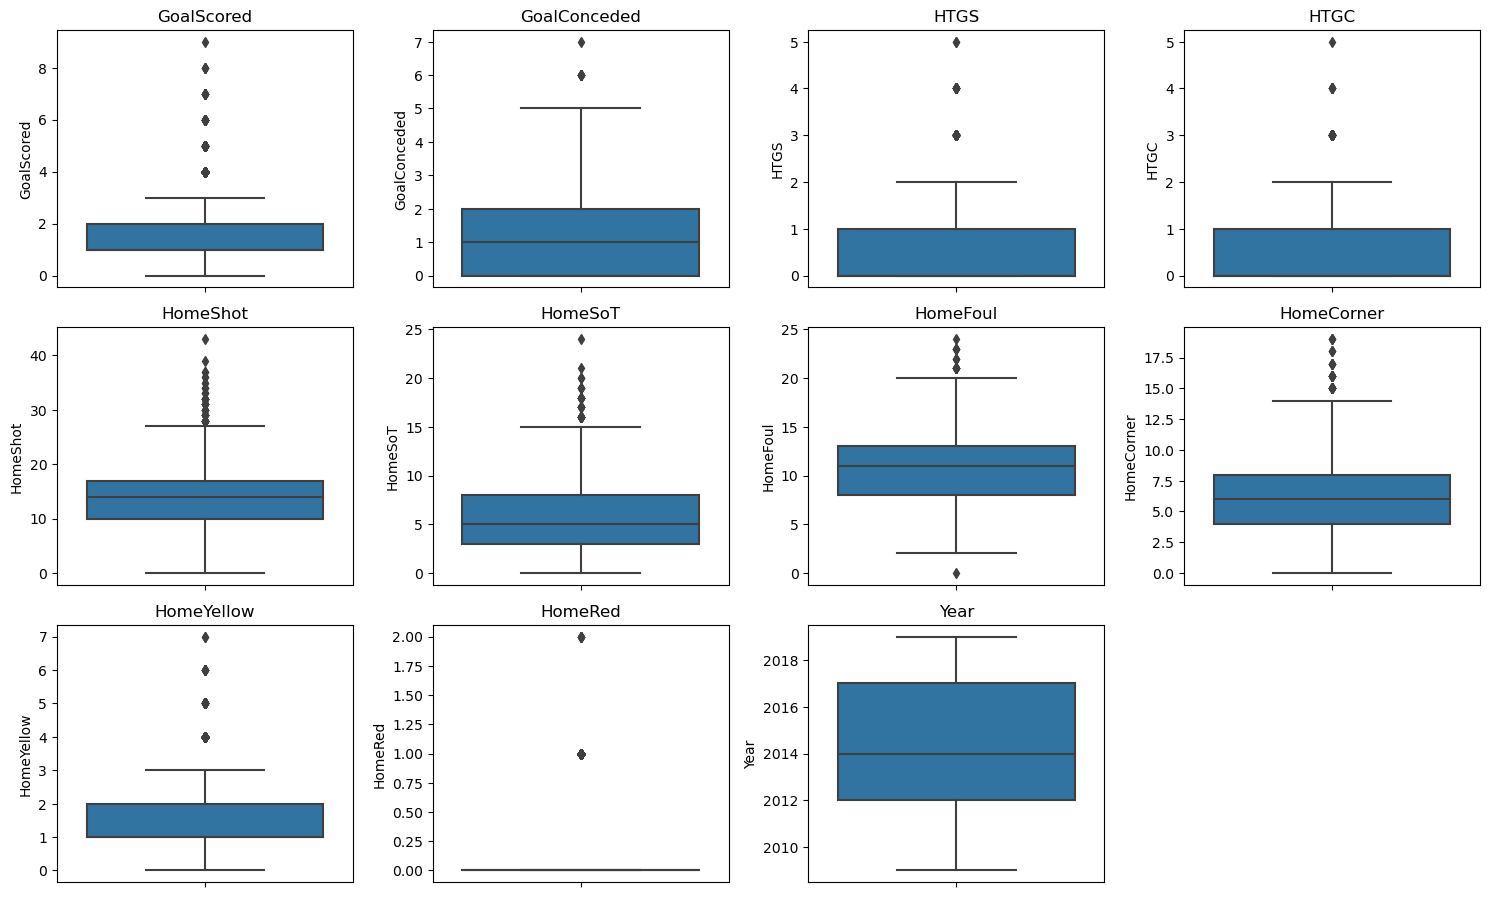

In [17]:
plt.figure(figsize = (15, 12))

# Create subplots for each numerical feature
for i, feature in enumerate(numerical_df.columns, 1):  # Loop through all columns in df_num
    plt.subplot(4, 4, i)  # Adjust rows/cols based on the number of features
    sns.boxplot(y = numerical_df[feature])
    plt.title(feature)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [18]:
# Look for outliers
z_scores = np.abs(stats.zscore(numerical_df))
numerical_clean = numerical_df[(z_scores < 3).all(axis = 1)]

# look at the amount of data after removing outliers
numerical_clean

,GoalScored,GoalConceded,HTGS,HTGC,HomeShot,HomeSoT,HomeFoul,HomeCorner,HomeYellow,HomeRed,Year
0,0,2,0,1,11,5,15,4,2,0,2009
1,0,2,0,1,17,9,12,5,2,0,2009
2,0,1,0,1,11,3,16,4,2,0,2009
3,2,1,1,1,26,12,13,12,1,0,2009
5,0,1,0,1,16,4,11,6,3,0,2009
...,...,...,...,...,...,...,...,...,...,...,...
3794,0,0,0,0,9,3,9,4,0,0,2019
3795,2,0,1,0,13,5,3,4,0,0,2019
3796,0,2,0,1,26,10,9,11,3,0,2019
3797,1,1,1,0,10,3,8,4,0,0,2019


In [19]:
# Create an empty df to store the categorical variables
categorical_df = pd.DataFrame()

# Create a DataFrame with only categorical features
categorical_df = football_home.select_dtypes(include = ['object']).astype('category')

# Display the categorical DataFrame
categorical_df

,HomeTeam,Result,HTResult,Referee
0,Aston Villa,A,A,M Clattenburg
1,Blackburn,A,A,M Dean
2,Bolton,A,A,A Marriner
3,Chelsea,H,D,A Wiley
4,Everton,A,A,M Halsey
...,...,...,...,...
3795,Liverpool,H,H,M Atkinson
3796,Man United,A,A,J Moss
3797,Southampton,D,H,L Probert
3798,Tottenham,D,H,A Marriner


In [20]:
# combine the two dfs
combine_df = pd.concat([numerical_clean, categorical_df], axis = 1)
football_clean = combine_df.dropna()
football_clean

,GoalScored,GoalConceded,HTGS,HTGC,HomeShot,HomeSoT,HomeFoul,HomeCorner,HomeYellow,HomeRed,Year,HomeTeam,Result,HTResult,Referee
0,0.0,2.0,0.0,1.0,11.0,5.0,15.0,4.0,2.0,0.0,2009.0,Aston Villa,A,A,M Clattenburg
1,0.0,2.0,0.0,1.0,17.0,9.0,12.0,5.0,2.0,0.0,2009.0,Blackburn,A,A,M Dean
2,0.0,1.0,0.0,1.0,11.0,3.0,16.0,4.0,2.0,0.0,2009.0,Bolton,A,A,A Marriner
3,2.0,1.0,1.0,1.0,26.0,12.0,13.0,12.0,1.0,0.0,2009.0,Chelsea,H,D,A Wiley
5,0.0,1.0,0.0,1.0,16.0,4.0,11.0,6.0,3.0,0.0,2009.0,Portsmouth,A,A,M Atkinson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0.0,0.0,0.0,0.0,9.0,3.0,9.0,4.0,0.0,0.0,2019.0,Leicester,D,D,A Taylor
3795,2.0,0.0,1.0,0.0,13.0,5.0,3.0,4.0,0.0,0.0,2019.0,Liverpool,H,H,M Atkinson
3796,0.0,2.0,0.0,1.0,26.0,10.0,9.0,11.0,3.0,0.0,2019.0,Man United,A,A,J Moss
3797,1.0,1.0,1.0,0.0,10.0,3.0,8.0,4.0,0.0,0.0,2019.0,Southampton,D,H,L Probert


In [21]:
football_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3355 entries, 0 to 3798
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   GoalScored    3355 non-null   float64 
 1   GoalConceded  3355 non-null   float64 
 2   HTGS          3355 non-null   float64 
 3   HTGC          3355 non-null   float64 
 4   HomeShot      3355 non-null   float64 
 5   HomeSoT       3355 non-null   float64 
 6   HomeFoul      3355 non-null   float64 
 7   HomeCorner    3355 non-null   float64 
 8   HomeYellow    3355 non-null   float64 
 9   HomeRed       3355 non-null   float64 
 10  Year          3355 non-null   float64 
 11  HomeTeam      3355 non-null   category
 12  Result        3355 non-null   category
 13  HTResult      3355 non-null   category
 14  Referee       3355 non-null   category
dtypes: category(4), float64(11)
memory usage: 330.5 KB


## Feature for Unsupervised Learning
### Targeting features on the HomeTeam

## Feature Selection
### For numerical features

In [24]:
numerical_clean = football_clean.select_dtypes(include = np.number)
numerical_clean

,GoalScored,GoalConceded,HTGS,HTGC,HomeShot,HomeSoT,HomeFoul,HomeCorner,HomeYellow,HomeRed,Year
0,0.0,2.0,0.0,1.0,11.0,5.0,15.0,4.0,2.0,0.0,2009.0
1,0.0,2.0,0.0,1.0,17.0,9.0,12.0,5.0,2.0,0.0,2009.0
2,0.0,1.0,0.0,1.0,11.0,3.0,16.0,4.0,2.0,0.0,2009.0
3,2.0,1.0,1.0,1.0,26.0,12.0,13.0,12.0,1.0,0.0,2009.0
5,0.0,1.0,0.0,1.0,16.0,4.0,11.0,6.0,3.0,0.0,2009.0
...,...,...,...,...,...,...,...,...,...,...,...
3794,0.0,0.0,0.0,0.0,9.0,3.0,9.0,4.0,0.0,0.0,2019.0
3795,2.0,0.0,1.0,0.0,13.0,5.0,3.0,4.0,0.0,0.0,2019.0
3796,0.0,2.0,0.0,1.0,26.0,10.0,9.0,11.0,3.0,0.0,2019.0
3797,1.0,1.0,1.0,0.0,10.0,3.0,8.0,4.0,0.0,0.0,2019.0


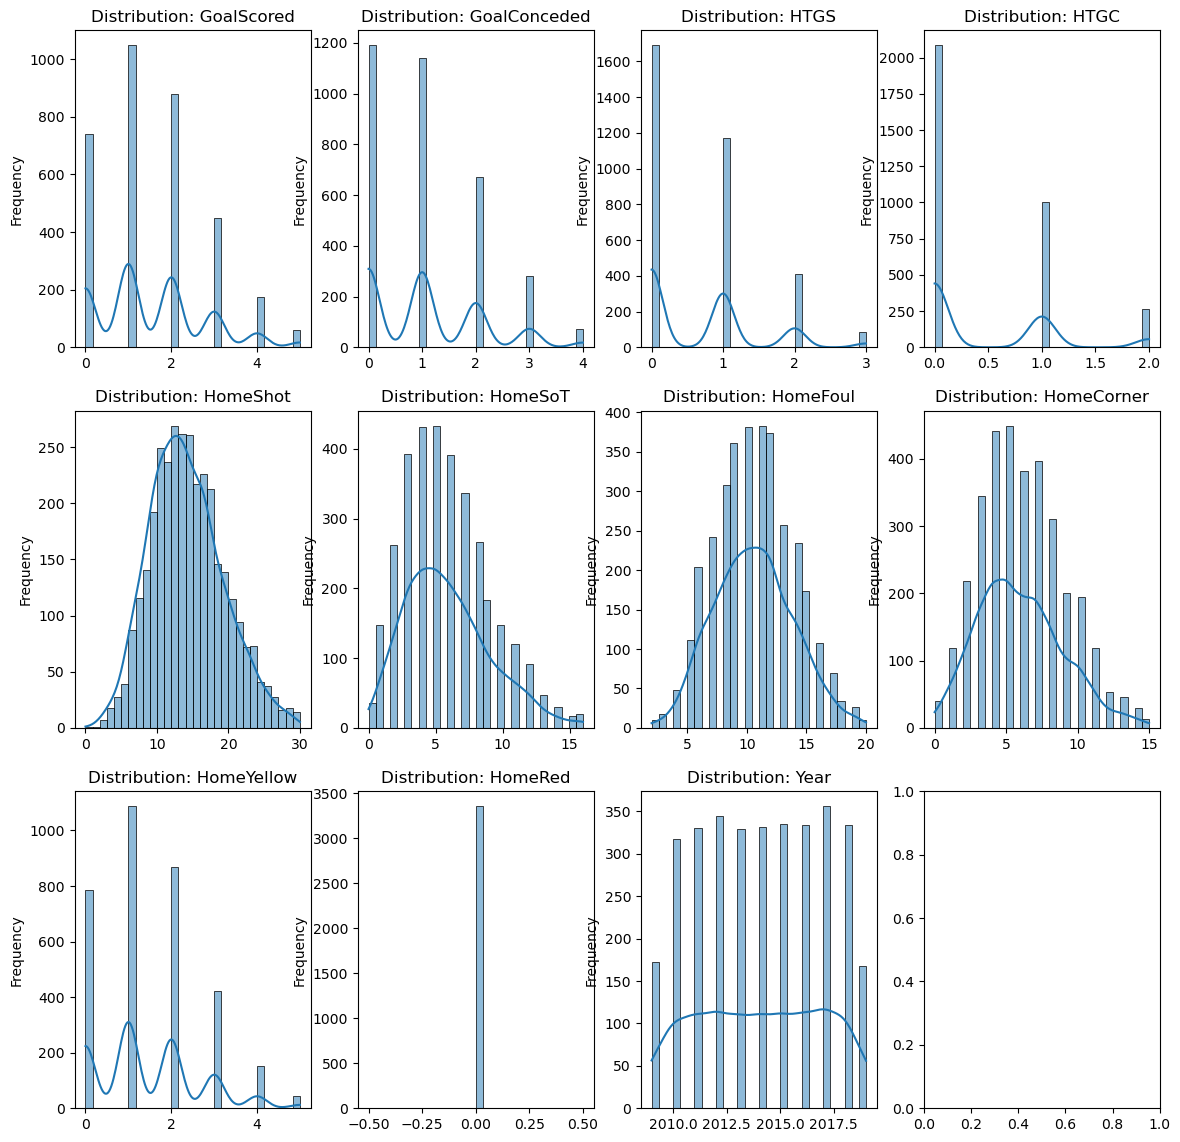

In [26]:
# Distribution plots
fig, axes = plt.subplots(3, 4, figsize = (14, 14)) 

axes = axes.flatten()

for i, col in enumerate(numerical_clean):
    sns.histplot(numerical_clean[col], kde = True, ax = axes[i], bins = 30) 
    axes[i].set_title(f'Distribution: {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

In [27]:
# Create correlation
football_corr = numerical_clean.corr().round(3)
football_corr

,GoalScored,GoalConceded,HTGS,HTGC,HomeShot,HomeSoT,HomeFoul,HomeCorner,HomeYellow,HomeRed,Year
GoalScored,1.000,-0.060,0.657,-0.032,0.265,0.431,-0.052,0.054,-0.101,NaN,-0.015
GoalConceded,-0.060,1.000,-0.061,0.647,-0.098,-0.091,0.026,-0.059,0.135,NaN,0.009
HTGS,0.657,-0.061,1.000,-0.047,0.090,0.252,-0.002,-0.051,-0.086,NaN,-0.037
HTGC,-0.032,0.647,-0.047,1.000,-0.009,-0.038,0.030,0.008,0.133,NaN,0.008
HomeShot,0.265,-0.098,0.090,-0.009,1.000,0.622,-0.124,0.492,-0.103,NaN,0.015
HomeSoT,0.431,-0.091,0.252,-0.038,0.622,1.000,-0.053,0.333,-0.126,NaN,-0.379
HomeFoul,-0.052,0.026,-0.002,0.030,-0.124,-0.053,1.000,-0.115,0.358,NaN,-0.082
HomeCorner,0.054,-0.059,-0.051,0.008,0.492,0.333,-0.115,1.000,-0.079,NaN,-0.057
HomeYellow,-0.101,0.135,-0.086,0.133,-0.103,-0.126,0.358,-0.079,1.000,NaN,0.064
HomeRed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Correlation Matrix')

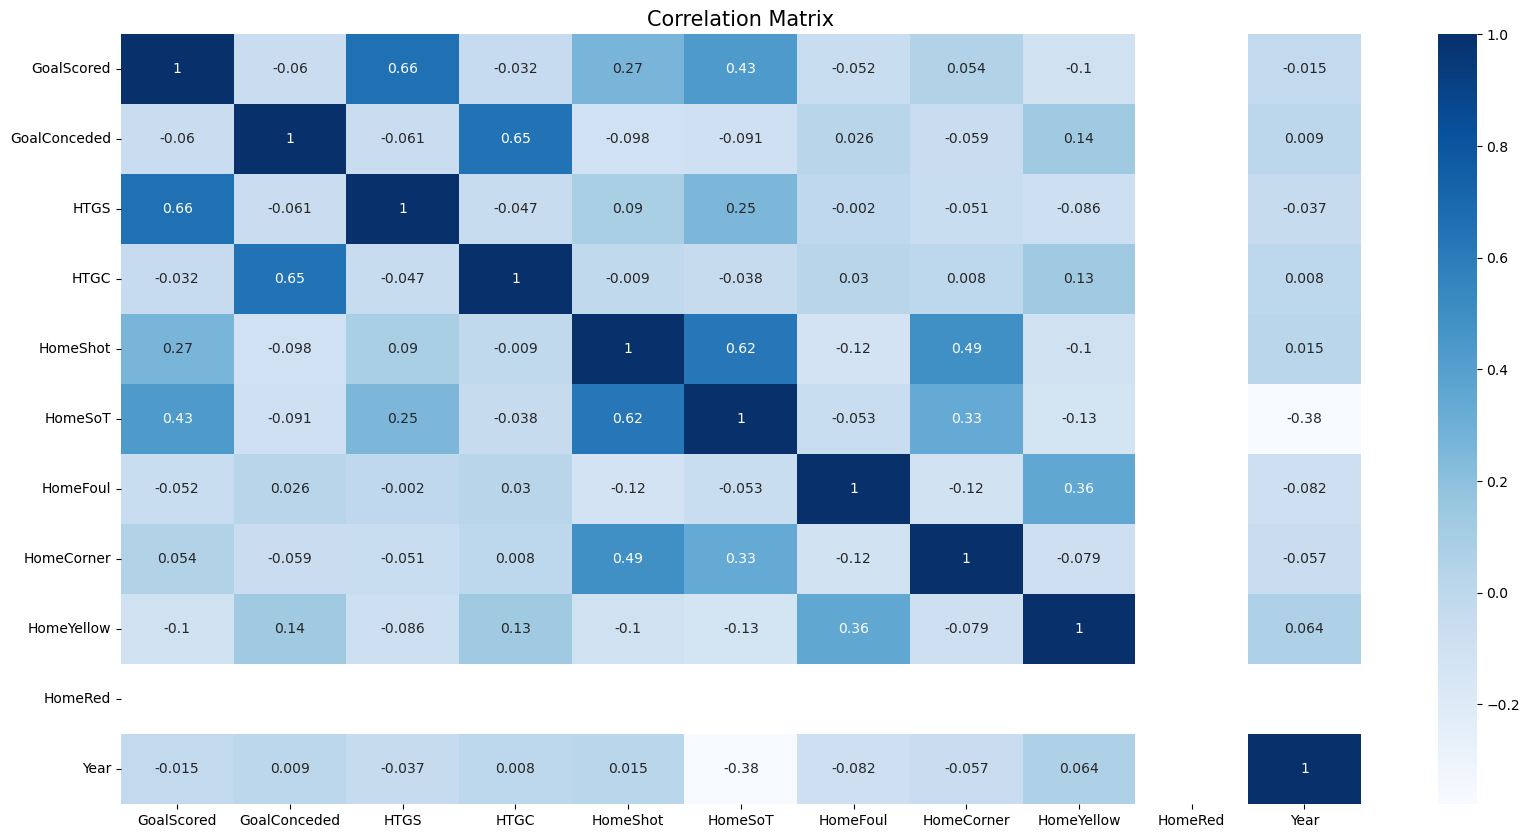

In [28]:
# Plot the correlation matrix
test = plt.figure(figsize = (20, 10))
sns.heatmap(football_corr, annot = True, cmap = 'Blues') 
plt.title("Correlation Matrix", fontsize='15')

In [29]:
# Get the correlation of 'GoalsScored' with all other numerical features
goals_corr = football_corr['GoalScored'].abs()

# Remove the diagonal element (self-correlation) by excluding 'GoalsScored' itself
goals_corr = goals_corr.drop('GoalScored')

# Get the top 5 highest absolute correlations with 'GoalsScored'
top_5_goals_corr = goals_corr.sort_values(ascending = False).head(5)

# Display the top 5 correlations
print(top_5_goals_corr)

HTGS            0.657
HomeSoT         0.431
HomeShot        0.265
HomeYellow      0.101
GoalConceded    0.060
Name: GoalScored, dtype: float64


In [30]:
# Remove "HomeRed" as they have 0 correlation
football_clean = football_clean.drop(["HomeRed"], axis = 1)
football_clean

,GoalScored,GoalConceded,HTGS,HTGC,HomeShot,HomeSoT,HomeFoul,HomeCorner,HomeYellow,Year,HomeTeam,Result,HTResult,Referee
0,0.0,2.0,0.0,1.0,11.0,5.0,15.0,4.0,2.0,2009.0,Aston Villa,A,A,M Clattenburg
1,0.0,2.0,0.0,1.0,17.0,9.0,12.0,5.0,2.0,2009.0,Blackburn,A,A,M Dean
2,0.0,1.0,0.0,1.0,11.0,3.0,16.0,4.0,2.0,2009.0,Bolton,A,A,A Marriner
3,2.0,1.0,1.0,1.0,26.0,12.0,13.0,12.0,1.0,2009.0,Chelsea,H,D,A Wiley
5,0.0,1.0,0.0,1.0,16.0,4.0,11.0,6.0,3.0,2009.0,Portsmouth,A,A,M Atkinson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0.0,0.0,0.0,0.0,9.0,3.0,9.0,4.0,0.0,2019.0,Leicester,D,D,A Taylor
3795,2.0,0.0,1.0,0.0,13.0,5.0,3.0,4.0,0.0,2019.0,Liverpool,H,H,M Atkinson
3796,0.0,2.0,0.0,1.0,26.0,10.0,9.0,11.0,3.0,2019.0,Man United,A,A,J Moss
3797,1.0,1.0,1.0,0.0,10.0,3.0,8.0,4.0,0.0,2019.0,Southampton,D,H,L Probert


In [31]:
football_clean.info(())

<class 'pandas.core.frame.DataFrame'>
Index: 3355 entries, 0 to 3798
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   GoalScored    3355 non-null   float64 
 1   GoalConceded  3355 non-null   float64 
 2   HTGS          3355 non-null   float64 
 3   HTGC          3355 non-null   float64 
 4   HomeShot      3355 non-null   float64 
 5   HomeSoT       3355 non-null   float64 
 6   HomeFoul      3355 non-null   float64 
 7   HomeCorner    3355 non-null   float64 
 8   HomeYellow    3355 non-null   float64 
 9   Year          3355 non-null   float64 
 10  HomeTeam      3355 non-null   category
 11  Result        3355 non-null   category
 12  HTResult      3355 non-null   category
 13  Referee       3355 non-null   category
dtypes: category(4), float64(10)
memory usage: 304.3 KB


## Feature Selection
### For categorical Features

### Variance Threshold

In [32]:
# split into x and y features
x = football_clean.drop('GoalScored', axis = 1)
y = football_clean['GoalScored']
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3355 entries, 0 to 3798
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   GoalConceded  3355 non-null   float64 
 1   HTGS          3355 non-null   float64 
 2   HTGC          3355 non-null   float64 
 3   HomeShot      3355 non-null   float64 
 4   HomeSoT       3355 non-null   float64 
 5   HomeFoul      3355 non-null   float64 
 6   HomeCorner    3355 non-null   float64 
 7   HomeYellow    3355 non-null   float64 
 8   Year          3355 non-null   float64 
 9   HomeTeam      3355 non-null   category
 10  Result        3355 non-null   category
 11  HTResult      3355 non-null   category
 12  Referee       3355 non-null   category
dtypes: category(4), float64(9)
memory usage: 278.1 KB


In [33]:
# numerical features only
numerical_features = x.select_dtypes(include = ['int', 'float64']).columns.tolist()
numerical_features

['GoalConceded',
 'HTGS',
 'HTGC',
 'HomeShot',
 'HomeSoT',
 'HomeFoul',
 'HomeCorner',
 'HomeYellow',
 'Year']

In [34]:
# categorical features only
categorical_features = x.select_dtypes(include = ['category']).columns.tolist()
categorical_features

['HomeTeam', 'Result', 'HTResult', 'Referee']

In [37]:
# split to ordinal and label
ordinal_features = ['Result', 'HTResult']
label_features = ['HomeTeam', 'Referee']

In [38]:
# define the order for ordinal_features
categories = {
    'Result': ['H', 'D', 'A'],
    'HTResult': ['H', 'D', 'A']
}

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories = [categories[col] for col in ordinal_features])

# Label Encoding
home_team_encoder = LabelEncoder()
referee_encoder = LabelEncoder()

# Label encoding for 'HomeTeam' and 'Referee'
x['HomeTeam'] = home_team_encoder.fit_transform(x['HomeTeam'])
x['Referee'] = referee_encoder.fit_transform(x['Referee'])

In [39]:
# Preprocessing
preprocessor = ColumnTransformer([
    ("num", "passthrough", numerical_features),
    ("ord", ordinal_encoder, ordinal_features),
    ("lbl", "passthrough", label_features)
])

x_preprocessed = preprocessor.fit_transform(x)

x_preprocessed_df = pd.DataFrame(x_preprocessed, columns = numerical_features + ordinal_features + label_features)
x_preprocessed_df

,GoalConceded,HTGS,HTGC,HomeShot,HomeSoT,HomeFoul,HomeCorner,HomeYellow,Year,Result,HTResult,HomeTeam,Referee
0,2.0,0.0,1.0,11.0,5.0,15.0,4.0,2.0,2009.0,2.0,2.0,1.0,16.0
1,2.0,0.0,1.0,17.0,9.0,12.0,5.0,2.0,2009.0,2.0,2.0,3.0,17.0
2,1.0,0.0,1.0,11.0,3.0,16.0,4.0,2.0,2009.0,2.0,2.0,5.0,1.0
3,1.0,1.0,1.0,26.0,12.0,13.0,12.0,1.0,2009.0,0.0,1.0,10.0,3.0
4,1.0,0.0,1.0,16.0,4.0,11.0,6.0,3.0,2009.0,2.0,2.0,23.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350,0.0,0.0,0.0,9.0,3.0,9.0,4.0,0.0,2019.0,1.0,1.0,16.0,2.0
3351,0.0,1.0,0.0,13.0,5.0,3.0,4.0,0.0,2019.0,0.0,0.0,17.0,15.0
3352,2.0,0.0,1.0,26.0,10.0,9.0,11.0,3.0,2019.0,2.0,2.0,19.0,10.0
3353,1.0,1.0,0.0,10.0,3.0,8.0,4.0,0.0,2019.0,1.0,0.0,26.0,14.0


In [40]:
# Calculate the variance for each column in x_preprocessed
variances = x_preprocessed.var(axis = 0)

feature_names = numerical_features + ordinal_features + label_features

# Set the variance threshold
variance_threshold = VarianceThreshold(threshold = 0.1)
x_selected = variance_threshold.fit_transform(x_preprocessed) # Select the features that fit the criteria

selected_features = [feature_names[i] for i in range(len(feature_names)) if variance_threshold.get_support()[i]]

print("Number of features after Variance Threshold:", len(selected_features))

Number of features after Variance Threshold: 13


In [41]:
selected_variances = variances[variance_threshold.get_support()]

selected_features_variance = pd.DataFrame({
    'Feature': selected_features,
    'Variance': selected_variances
})

# Sort the selected features by variance in descending order
variances_df = selected_features_variance.sort_values(by = 'Variance', ascending=False)
variances_df

,Feature,Variance
11,HomeTeam,105.473303
12,Referee,54.396113
3,HomeShot,26.257770
5,HomeFoul,11.019490
4,HomeSoT,10.180264
6,HomeCorner,8.900401
8,Year,8.499892
7,HomeYellow,1.392013
0,GoalConceded,1.077154
9,Result,0.697653


## PCA 

In [42]:
pipeline = Pipeline([
    #("preprocessor", preprocessor),   # Preprocessing step (including ordinal and label encoding)
    ("scaler", StandardScaler()),     # Standard scaling step
    ("pca", PCA())  # PCA step with variance retention
])

x_pca = pipeline.fit_transform(x_preprocessed_df)

explained_variance = pipeline.named_steps['pca'].explained_variance_ratio_.round(4)

cumulative_explained_variance = explained_variance.cumsum() # cumulated variance of all pc
cum_variance_df = pd.DataFrame({'Explained Variance Ratio': explained_variance, 'Cumulative Explained Variance': cumulative_explained_variance})

cum_variance_df

,Explained Variance Ratio,Cumulative Explained Variance
0,0.2410,0.2410
1,0.1516,0.3926
2,0.1046,0.4972
3,0.0923,0.5895
4,0.0828,0.6723
5,0.0767,0.7490
6,0.0755,0.8245
7,0.0474,0.8719
8,0.0461,0.9180
9,0.0408,0.9588


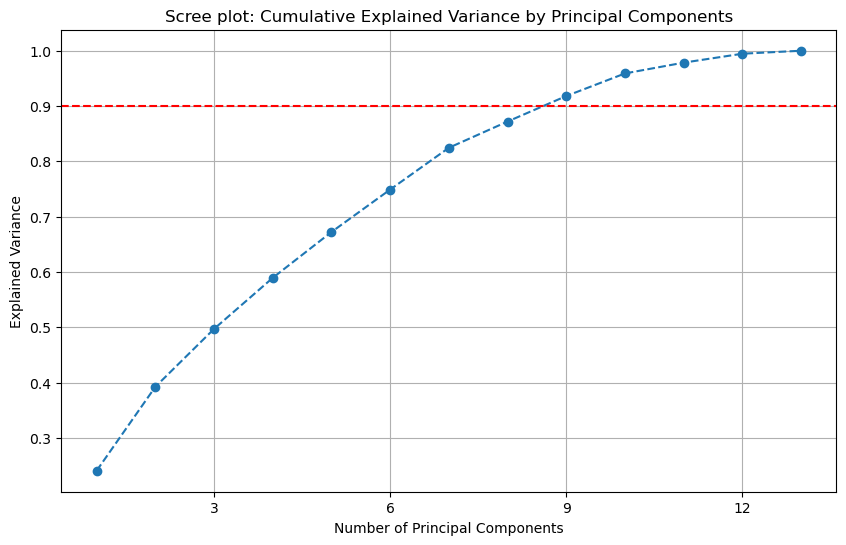

In [43]:
# Plot the cumulative variance and cut off at 90%
plt.figure(figsize = (10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker = 'o', linestyle = '--')
plt.title('Scree plot: Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.axhline(y = 0.9, color = 'red', linestyle = '--') # 10 PC to explained >90% of the variance
xticks = range(3, len(cumulative_explained_variance) + 1, 3)  # Adjust this to display 3, 6, 9, etc.
plt.xticks(xticks)

plt.grid(True)
plt.show()

In [45]:
# Create a new pipeline with 9 components
pca = PCA(n_components = 9)

pipeline = Pipeline([
    ("preprocessor", preprocessor),  # Preprocessing step (including ordinal and label encoding)
    ("scaler", StandardScaler()),    # Standard scaling step
    ("pca", pca)                     # PCA step with 9 components
])

x_pca = pipeline.fit_transform(x)

## K-Means

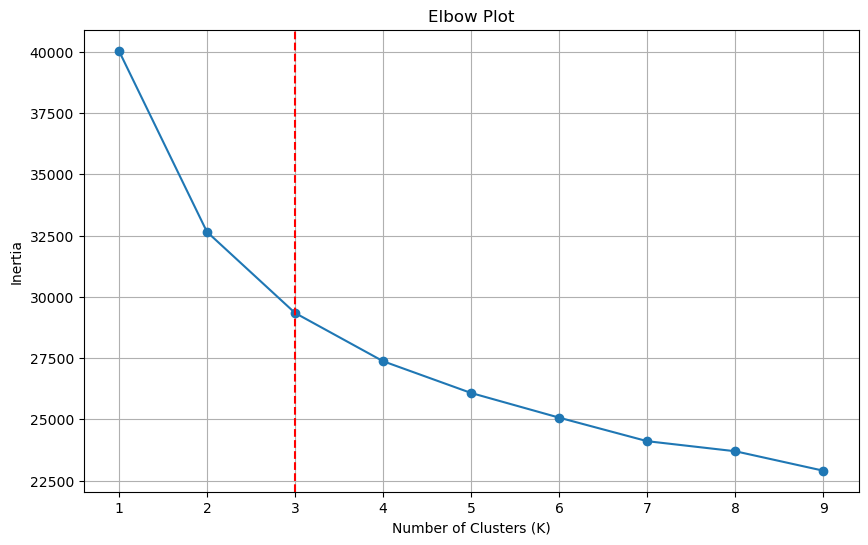

In [47]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(x_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Plot
plt.figure(figsize = (10, 6))
plt.plot(range(1, 10), inertia, marker ='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.axvline(x = 3, color = 'red', linestyle = '--')

plt.grid(True)
plt.show()

In [48]:
# Silhouette Score for K-means
num_kcluster = []
Ksilscore = []
for k in range(2, 11):  # Start from 2 because Silhouette requires at least 2 clusters
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(x_pca)
    kscore = silhouette_score(x_pca, kmeans.labels_)
    num_kcluster.append(k)
    Ksilscore.append(kscore)
    
ksilscore_df = pd.DataFrame({'Number of Clusters': num_kcluster, 'Silhouette Score': Ksilscore})
ksilscore_df

,Number of Clusters,Silhouette Score
0,2,0.176025
1,3,0.134520
2,4,0.119515
3,5,0.114003
4,6,0.106126
5,7,0.103407
6,8,0.093079
7,9,0.094849
8,10,0.092867


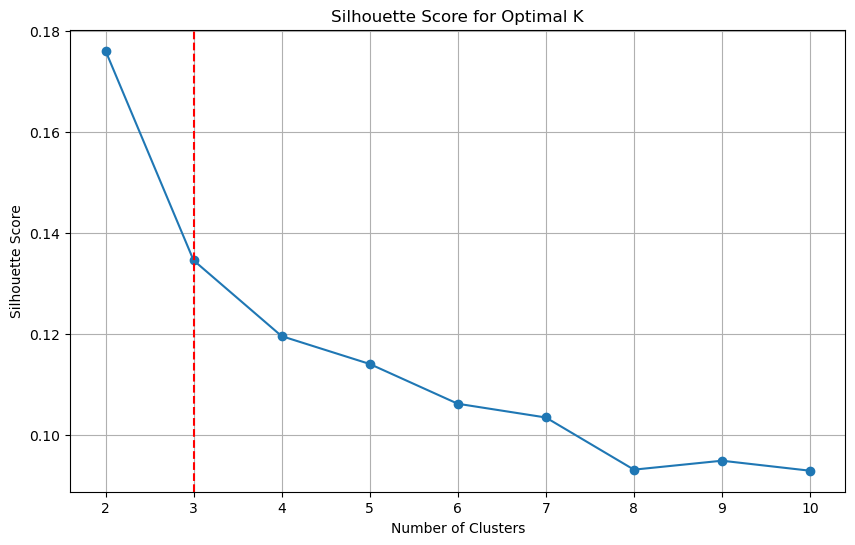

In [50]:
# Plot the silhouette score for K-means
plt.figure(figsize = (10, 6))
plt.plot(num_kcluster, Ksilscore, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.axvline(x = 3, color = 'red', linestyle = '--')  # easier to visualise why 3 clusters were chosen

plt.grid(True)
plt.show()

In [51]:
# set the optimal k value
optimal_k = 3

kmeans = KMeans(n_clusters = optimal_k, random_state = 42)
clusters = kmeans.fit_predict(x_pca)

# Create a new Kclsuter column to store the predicted clustering
football_clean['Kcluster'] = clusters
football_clean

,GoalScored,GoalConceded,HTGS,HTGC,HomeShot,HomeSoT,HomeFoul,HomeCorner,HomeYellow,Year,HomeTeam,Result,HTResult,Referee,Kcluster
0,0.0,2.0,0.0,1.0,11.0,5.0,15.0,4.0,2.0,2009.0,Aston Villa,A,A,M Clattenburg,0
1,0.0,2.0,0.0,1.0,17.0,9.0,12.0,5.0,2.0,2009.0,Blackburn,A,A,M Dean,0
2,0.0,1.0,0.0,1.0,11.0,3.0,16.0,4.0,2.0,2009.0,Bolton,A,A,A Marriner,0
3,2.0,1.0,1.0,1.0,26.0,12.0,13.0,12.0,1.0,2009.0,Chelsea,H,D,A Wiley,1
5,0.0,1.0,0.0,1.0,16.0,4.0,11.0,6.0,3.0,2009.0,Portsmouth,A,A,M Atkinson,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0.0,0.0,0.0,0.0,9.0,3.0,9.0,4.0,0.0,2019.0,Leicester,D,D,A Taylor,2
3795,2.0,0.0,1.0,0.0,13.0,5.0,3.0,4.0,0.0,2019.0,Liverpool,H,H,M Atkinson,1
3796,0.0,2.0,0.0,1.0,26.0,10.0,9.0,11.0,3.0,2019.0,Man United,A,A,J Moss,0
3797,1.0,1.0,1.0,0.0,10.0,3.0,8.0,4.0,0.0,2019.0,Southampton,D,H,L Probert,2


In [52]:
# Summary table
Kcluster_summary = football_clean.groupby('Kcluster').mean(numeric_only=True)
Kcluster_summary[['GoalScored', 'HomeShot', 'HomeSoT', 'GoalConceded']]

,GoalScored,HomeShot,HomeSoT,GoalConceded
Kcluster,,,,
0,1.028210,13.573930,5.119650,2.117704
1,2.297597,18.134011,8.628466,0.571165
2,1.302008,10.946185,4.122892,0.658635


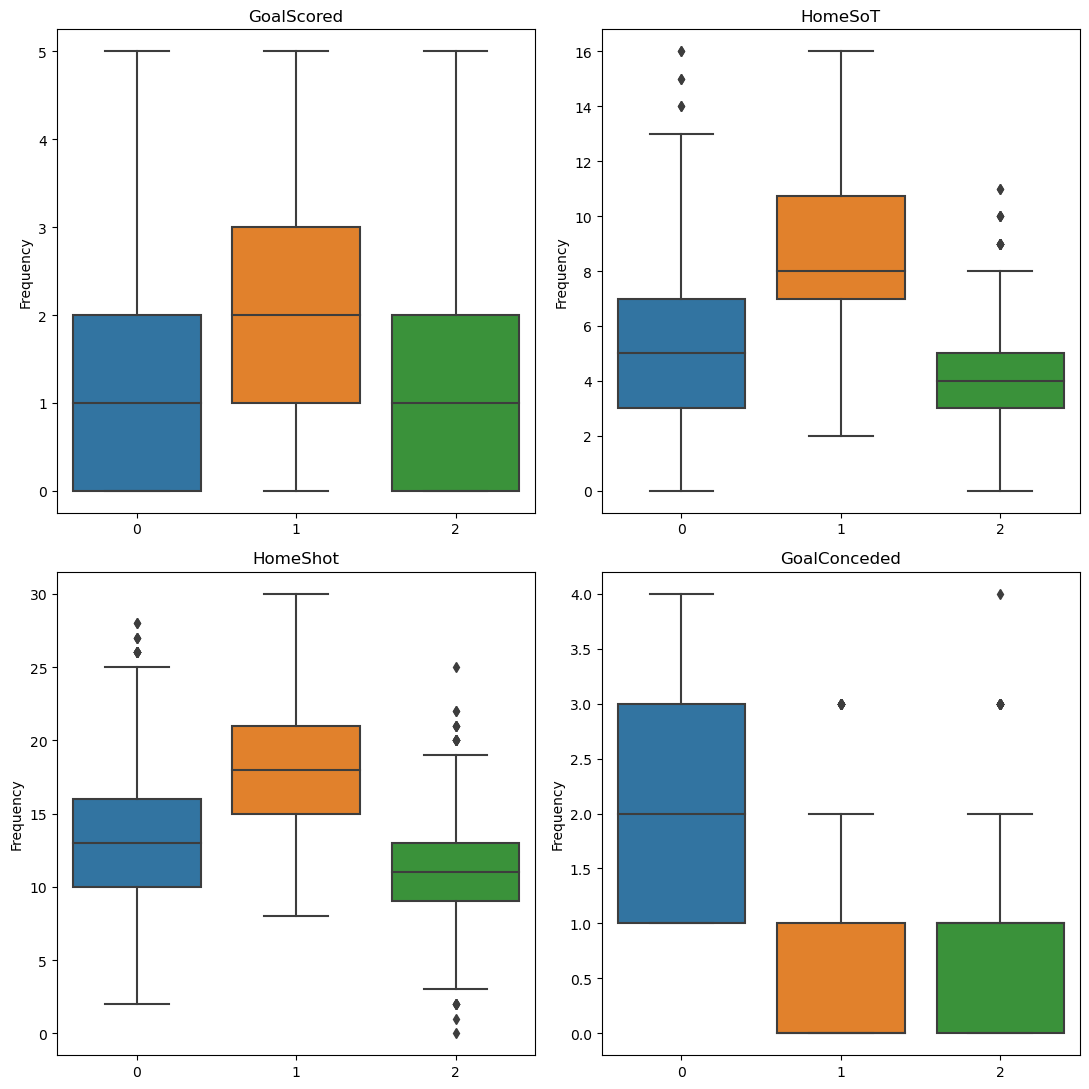

In [54]:
# plot the boxplot
boxplot_fig, boxplot_axes = plt.subplots(2, 2, figsize = (11, 11))

boxplot_axes = boxplot_axes.flatten()

features = ['GoalScored', 'HomeSoT', 'HomeShot', 'GoalConceded']

for i, col in enumerate(features):
    sns.boxplot(data = football_clean, x = 'Kcluster', y = col, ax = boxplot_axes[i])
    boxplot_axes[i].set_title(f'{col}')
    boxplot_axes[i].set_xlabel('')
    boxplot_axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

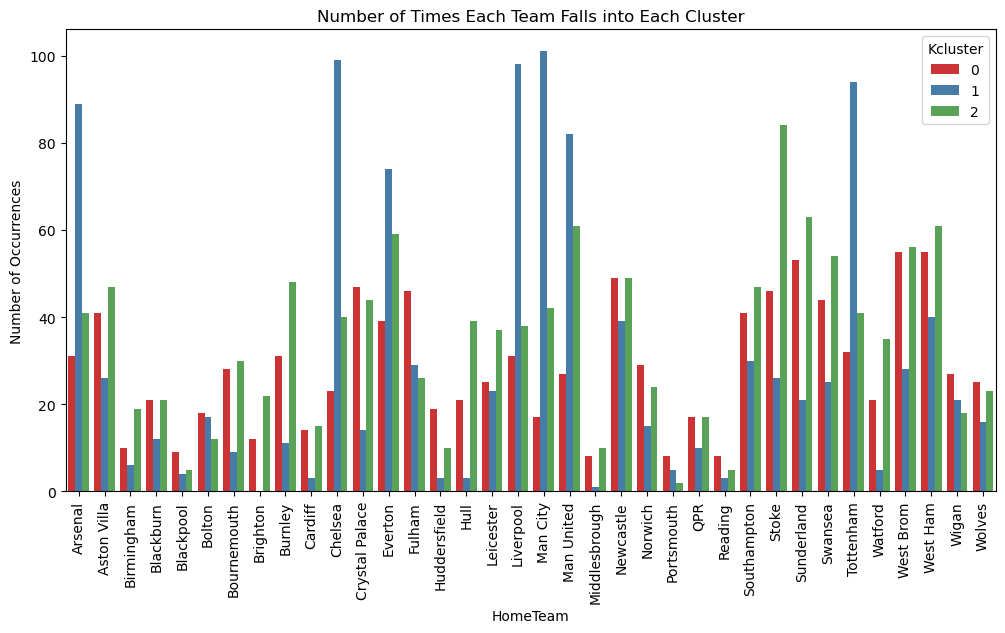

In [56]:
# Plot the number of times each team falls into each cluster
plt.figure(figsize = (12, 6))
sns.countplot(data = football_clean, x = 'HomeTeam', hue = 'Kcluster', palette = 'Set1')
plt.xticks(rotation = 90)
plt.title('Number of Times Each Team Falls into Each Cluster')
plt.xlabel('HomeTeam')
plt.ylabel('Number of Occurrences')
plt.show()

In [58]:
team_cluster_counts = football_clean.groupby(['HomeTeam', 'Kcluster'], observed=False).size().reset_index(name='Count')

# Find the most frequent cluster for each HomeTeam
max_cluster_count = team_cluster_counts.loc[team_cluster_counts.groupby('HomeTeam')['Count'].idxmax()]
team_features = football_clean[['HomeTeam', 'GoalScored', 'HomeShot', 'HomeSoT', 'GoalConceded', 'Kcluster']]

team_features

,HomeTeam,GoalScored,HomeShot,HomeSoT,GoalConceded,Kcluster
0,Aston Villa,0.0,11.0,5.0,2.0,0
1,Blackburn,0.0,17.0,9.0,2.0,0
2,Bolton,0.0,11.0,3.0,1.0,0
3,Chelsea,2.0,26.0,12.0,1.0,1
5,Portsmouth,0.0,16.0,4.0,1.0,0
...,...,...,...,...,...,...
3794,Leicester,0.0,9.0,3.0,0.0,2
3795,Liverpool,2.0,13.0,5.0,0.0,1
3796,Man United,0.0,26.0,10.0,2.0,0
3797,Southampton,1.0,10.0,3.0,1.0,2


In [59]:
max_cluster_count

,HomeTeam,Kcluster,Count
1,Arsenal,1,89
5,Aston Villa,2,47
8,Birmingham,2,19
9,Blackburn,0,21
12,Blackpool,0,9
15,Bolton,0,18
20,Bournemouth,2,30
23,Brighton,2,22
26,Burnley,2,48
29,Cardiff,2,15


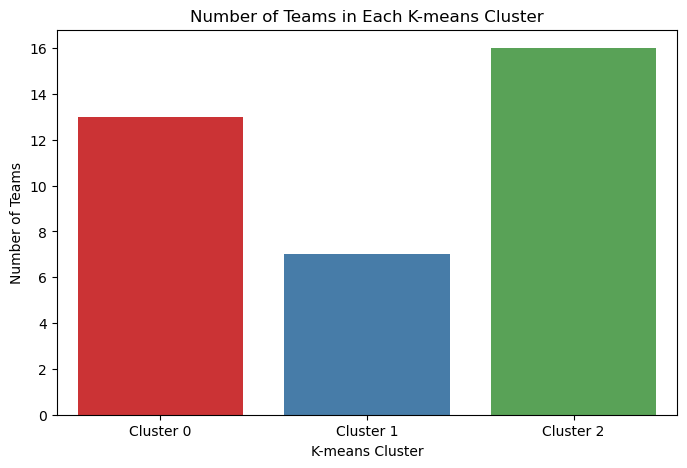

In [62]:
cluster_team_counts = max_cluster_count['Kcluster'].value_counts()

# Plot the number of teams in each cluster
plt.figure(figsize =(8, 5))
sns.barplot(x = cluster_team_counts.index, y = cluster_team_counts.values, palette = 'Set1')

# plot bar chart
plt.title('Number of Teams in Each K-means Cluster')
plt.xlabel('K-means Cluster')
plt.ylabel('Number of Teams')
plt.xticks(ticks = cluster_team_counts.index, labels = [f'Cluster {i}' for i in cluster_team_counts.index])

plt.show()

In [63]:
cluster_team_counts

Kcluster
2    16
0    13
1     7
Name: count, dtype: int64

## Hierarchical Agglomerative Clustering (HAC)

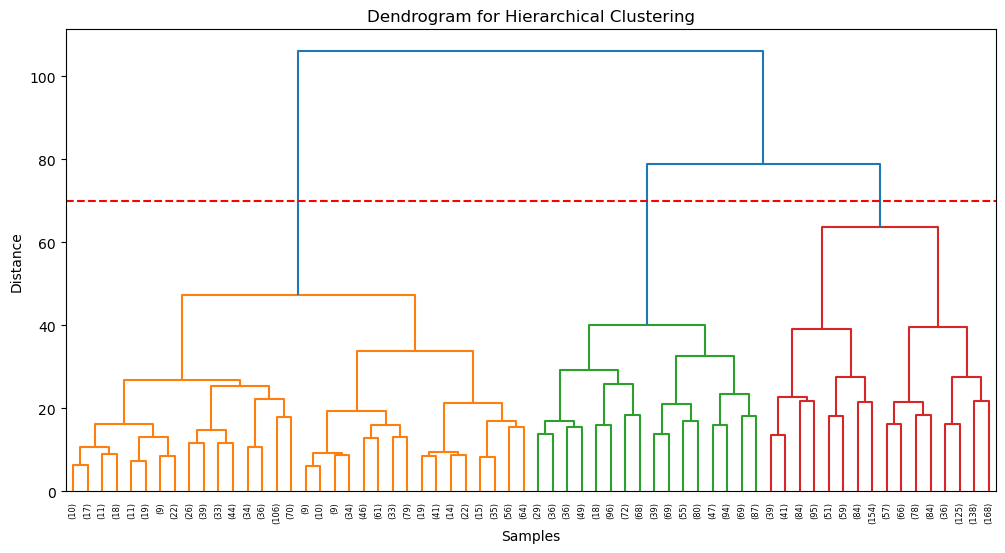

In [64]:
# Create the linkage matrix
linkage = sch.linkage(x_pca, method = "ward")

# Plot the dendrogram
plt.figure(figsize = (12, 6))
sch.dendrogram(linkage, truncate_mode = "level", p = 5)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.xticks(rotation = 90)  # Rotate labels
plt.ylabel("Distance")
plt.axhline(70, color = 'red', linestyle = '--')
plt.show()

In [65]:
# Silhouette score for HAC
num_Hcluster = []
Hsilscores = []
for h in range(2, 11):  # Start from 2 because Silhouette requires at least 2 clusters
    hac = AgglomerativeClustering(n_clusters = h)
    hac_labels = hac.fit_predict(x_pca)
    hscore = silhouette_score(x_pca, hac.labels_)
    num_Hcluster.append(h)
    Hsilscores.append(hscore)
    
hsilscore_df = pd.DataFrame({'Number of Clusters': num_Hcluster, 'Silhouette Score': Hsilscores})
hsilscore_df

,Number of Clusters,Silhouette Score
0,2,0.131189
1,3,0.101514
2,4,0.092880
3,5,0.076107
4,6,0.060301
5,7,0.056113
6,8,0.054556
7,9,0.048498
8,10,0.047812


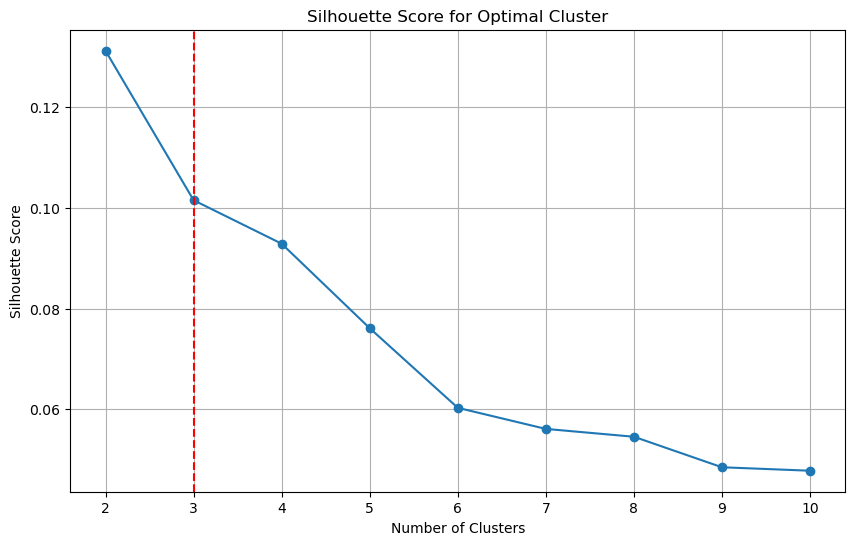

In [66]:
# plot the silhouette score for HAC
plt.figure(figsize = (10, 6))
plt.plot(num_Hcluster, Hsilscores, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Cluster')
plt.axvline(x = 3, color = 'red', linestyle = '--')  # easier to visualise why 3 clusters were chosen

plt.grid(True)
plt.show()

In [68]:
# optimal number of clusters for HAC
n_clusters = 3 
hac = AgglomerativeClustering(n_clusters = n_clusters, linkage="ward")
labels = hac.fit_predict(x_pca)

# Create a Hcluster column to store the HAC clustering
football_clean["Hcluster"] = labels
football_clean

,GoalScored,GoalConceded,HTGS,HTGC,HomeShot,HomeSoT,HomeFoul,HomeCorner,HomeYellow,Year,HomeTeam,Result,HTResult,Referee,Kcluster,Hcluster
0,0.0,2.0,0.0,1.0,11.0,5.0,15.0,4.0,2.0,2009.0,Aston Villa,A,A,M Clattenburg,0,2
1,0.0,2.0,0.0,1.0,17.0,9.0,12.0,5.0,2.0,2009.0,Blackburn,A,A,M Dean,0,2
2,0.0,1.0,0.0,1.0,11.0,3.0,16.0,4.0,2.0,2009.0,Bolton,A,A,A Marriner,0,2
3,2.0,1.0,1.0,1.0,26.0,12.0,13.0,12.0,1.0,2009.0,Chelsea,H,D,A Wiley,1,0
5,0.0,1.0,0.0,1.0,16.0,4.0,11.0,6.0,3.0,2009.0,Portsmouth,A,A,M Atkinson,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0.0,0.0,0.0,0.0,9.0,3.0,9.0,4.0,0.0,2019.0,Leicester,D,D,A Taylor,2,0
3795,2.0,0.0,1.0,0.0,13.0,5.0,3.0,4.0,0.0,2019.0,Liverpool,H,H,M Atkinson,1,1
3796,0.0,2.0,0.0,1.0,26.0,10.0,9.0,11.0,3.0,2019.0,Man United,A,A,J Moss,0,0
3797,1.0,1.0,1.0,0.0,10.0,3.0,8.0,4.0,0.0,2019.0,Southampton,D,H,L Probert,2,1


In [69]:
# Summary table
Hcluster_summary = football_clean.groupby('Hcluster').mean(numeric_only = True)
Hcluster_summary[['GoalScored', 'HomeShot', 'HomeSoT', 'GoalConceded']]

,GoalScored,HomeShot,HomeSoT,GoalConceded
Hcluster,,,,
0,1.166299,14.718911,5.973510,0.738779
1,2.476236,15.105513,7.073194,0.627376
2,1.031780,11.979873,4.420551,2.066737


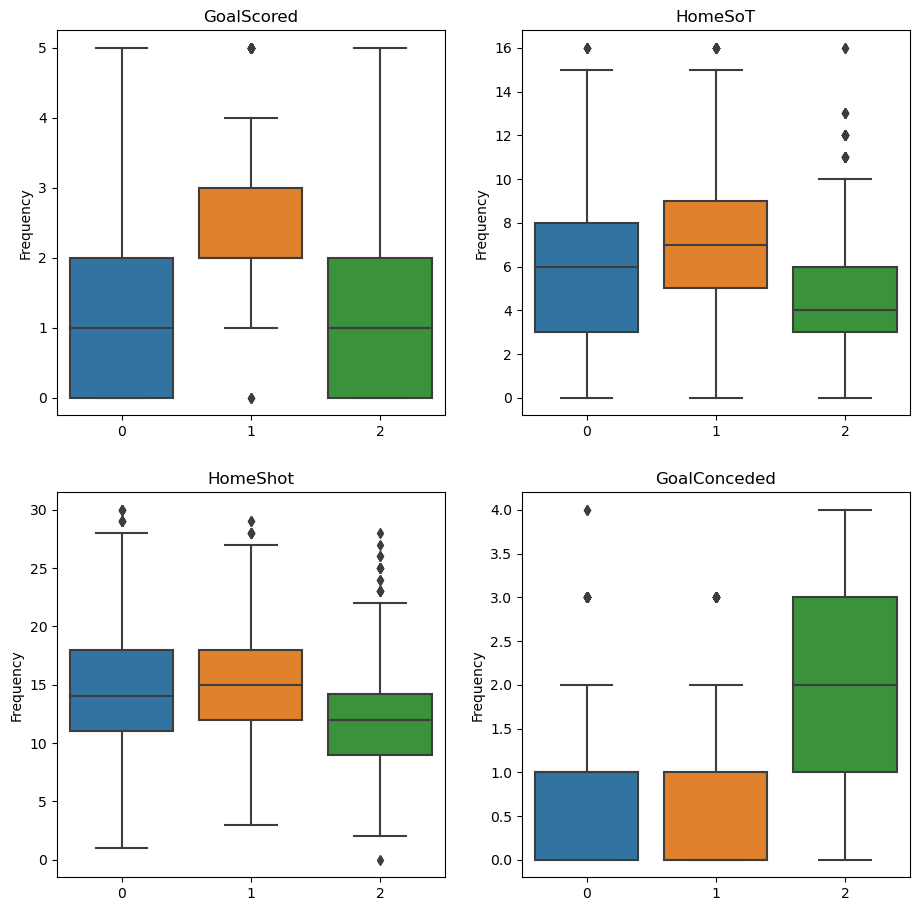

In [70]:
# plot the boxplot
boxplot_fig, boxplot_axes = plt.subplots(2, 2, figsize = (11, 11))

boxplot_axes = boxplot_axes.flatten()

features = ['GoalScored', 'HomeSoT', 'HomeShot', 'GoalConceded']

for i, col in enumerate(features):
    sns.boxplot(data = football_clean, x = 'Hcluster', y = col, ax = boxplot_axes[i])
    boxplot_axes[i].set_title(f'{col}')
    boxplot_axes[i].set_xlabel('')
    boxplot_axes[i].set_ylabel('Frequency')

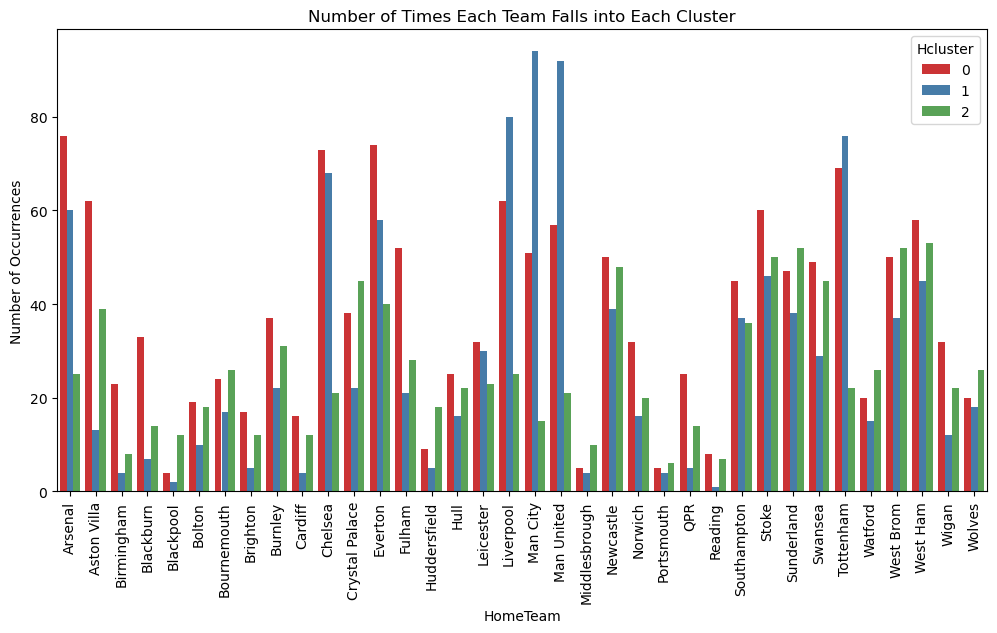

In [71]:
# Plot the number of times each team falls into each cluster
plt.figure(figsize = (12, 6))
sns.countplot(data = football_clean, x = 'HomeTeam', hue = 'Hcluster', palette = 'Set1')
plt.xticks(rotation = 90)
plt.title('Number of Times Each Team Falls into Each Cluster')
plt.xlabel('HomeTeam')
plt.ylabel('Number of Occurrences')
plt.show()

In [72]:
Hcluster_counts = football_clean.groupby(['HomeTeam', 'Hcluster'], observed = False).size().reset_index(name = 'Count')

# Find the most frequent cluster for each HomeTeam
max_Hcounts = Hcluster_counts.loc[Hcluster_counts.groupby('HomeTeam')['Count'].idxmax()]

# Extract relevant team features
HFeatures = football_clean[['HomeTeam', 'GoalScored', 'HomeShot', 'HomeSoT', 'GoalConceded', 'Hcluster']]

HFeatures

,HomeTeam,GoalScored,HomeShot,HomeSoT,GoalConceded,Hcluster
0,Aston Villa,0.0,11.0,5.0,2.0,2
1,Blackburn,0.0,17.0,9.0,2.0,2
2,Bolton,0.0,11.0,3.0,1.0,2
3,Chelsea,2.0,26.0,12.0,1.0,0
5,Portsmouth,0.0,16.0,4.0,1.0,2
...,...,...,...,...,...,...
3794,Leicester,0.0,9.0,3.0,0.0,0
3795,Liverpool,2.0,13.0,5.0,0.0,1
3796,Man United,0.0,26.0,10.0,2.0,0
3797,Southampton,1.0,10.0,3.0,1.0,1


In [73]:
max_Hcounts

,HomeTeam,Hcluster,Count
0,Arsenal,0,76
3,Aston Villa,0,62
6,Birmingham,0,23
9,Blackburn,0,33
14,Blackpool,2,12
15,Bolton,0,19
20,Bournemouth,2,26
21,Brighton,0,17
24,Burnley,0,37
27,Cardiff,0,16


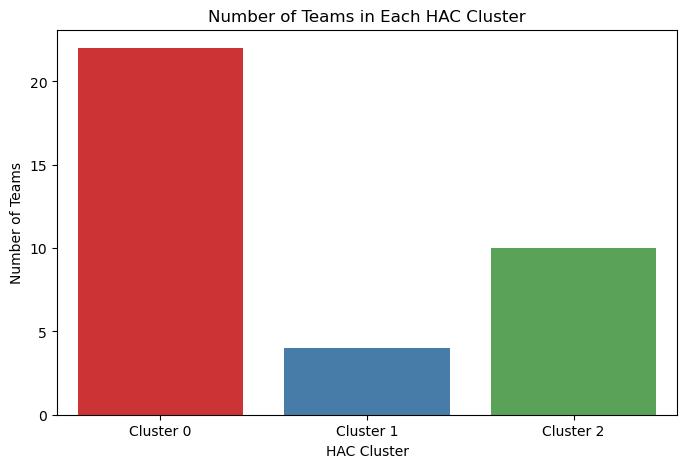

In [75]:
Hcluster_team_counts = max_Hcounts['Hcluster'].value_counts()

# Plot the number of teams in each HAC cluster
plt.figure(figsize = (8, 5))
sns.barplot(x = Hcluster_team_counts.index, y = Hcluster_team_counts.values, palette = 'Set1')

# plot the bar chart for HAC
plt.title('Number of Teams in Each HAC Cluster')
plt.xlabel('HAC Cluster')
plt.ylabel('Number of Teams')
plt.xticks(ticks = Hcluster_team_counts.index, labels = [f'Cluster {i}' for i in Hcluster_team_counts.index])

plt.show()

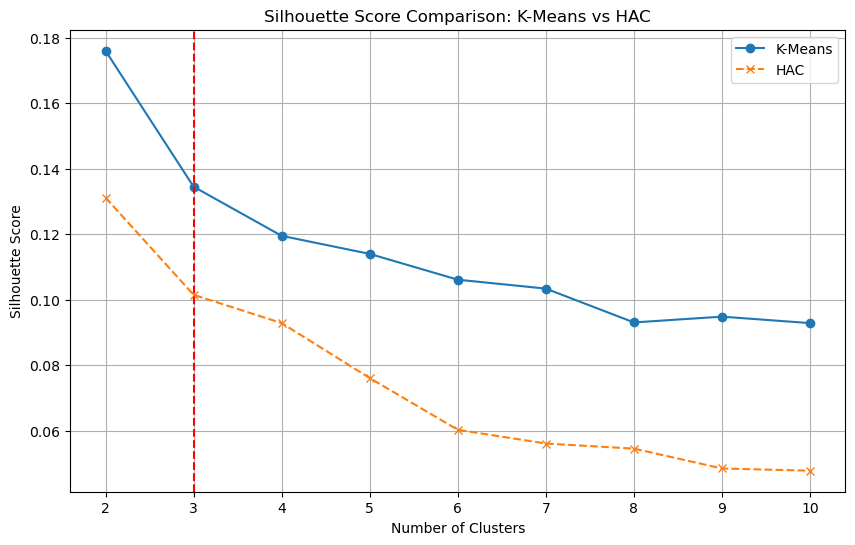

In [76]:
# Compare K-means and HAC silhouette score
plt.figure(figsize = (10, 6))
plt.plot(num_kcluster, Ksilscore, marker = 'o', label = 'K-Means')
plt.plot(num_Hcluster, Hsilscores, marker = 'x', label = 'HAC', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Comparison: K-Means vs HAC')
plt.axvline(x = 3, color = 'red', linestyle = '--')
plt.legend()

plt.grid(True)
plt.show()

In [82]:
football_clean

,GoalScored,GoalConceded,HTGS,HTGC,HomeShot,HomeSoT,HomeFoul,HomeCorner,HomeYellow,Year,HomeTeam,Result,HTResult,Referee,Kcluster,Hcluster
0,0.0,2.0,0.0,1.0,11.0,5.0,15.0,4.0,2.0,2009.0,Aston Villa,A,A,M Clattenburg,0,2
1,0.0,2.0,0.0,1.0,17.0,9.0,12.0,5.0,2.0,2009.0,Blackburn,A,A,M Dean,0,2
2,0.0,1.0,0.0,1.0,11.0,3.0,16.0,4.0,2.0,2009.0,Bolton,A,A,A Marriner,0,2
3,2.0,1.0,1.0,1.0,26.0,12.0,13.0,12.0,1.0,2009.0,Chelsea,H,D,A Wiley,1,0
5,0.0,1.0,0.0,1.0,16.0,4.0,11.0,6.0,3.0,2009.0,Portsmouth,A,A,M Atkinson,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0.0,0.0,0.0,0.0,9.0,3.0,9.0,4.0,0.0,2019.0,Leicester,D,D,A Taylor,2,0
3795,2.0,0.0,1.0,0.0,13.0,5.0,3.0,4.0,0.0,2019.0,Liverpool,H,H,M Atkinson,1,1
3796,0.0,2.0,0.0,1.0,26.0,10.0,9.0,11.0,3.0,2019.0,Man United,A,A,J Moss,0,0
3797,1.0,1.0,1.0,0.0,10.0,3.0,8.0,4.0,0.0,2019.0,Southampton,D,H,L Probert,2,1


## Classification

### Using the same dataset as Unsupervised Learning

### Data Cleaning

In [83]:
# Reusing the same dataset as unsupervised learning
football_class = football_clean.copy()
football_class

,GoalScored,GoalConceded,HTGS,HTGC,HomeShot,HomeSoT,HomeFoul,HomeCorner,HomeYellow,Year,HomeTeam,Result,HTResult,Referee,Kcluster,Hcluster
0,0.0,2.0,0.0,1.0,11.0,5.0,15.0,4.0,2.0,2009.0,Aston Villa,A,A,M Clattenburg,0,2
1,0.0,2.0,0.0,1.0,17.0,9.0,12.0,5.0,2.0,2009.0,Blackburn,A,A,M Dean,0,2
2,0.0,1.0,0.0,1.0,11.0,3.0,16.0,4.0,2.0,2009.0,Bolton,A,A,A Marriner,0,2
3,2.0,1.0,1.0,1.0,26.0,12.0,13.0,12.0,1.0,2009.0,Chelsea,H,D,A Wiley,1,0
5,0.0,1.0,0.0,1.0,16.0,4.0,11.0,6.0,3.0,2009.0,Portsmouth,A,A,M Atkinson,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0.0,0.0,0.0,0.0,9.0,3.0,9.0,4.0,0.0,2019.0,Leicester,D,D,A Taylor,2,0
3795,2.0,0.0,1.0,0.0,13.0,5.0,3.0,4.0,0.0,2019.0,Liverpool,H,H,M Atkinson,1,1
3796,0.0,2.0,0.0,1.0,26.0,10.0,9.0,11.0,3.0,2019.0,Man United,A,A,J Moss,0,0
3797,1.0,1.0,1.0,0.0,10.0,3.0,8.0,4.0,0.0,2019.0,Southampton,D,H,L Probert,2,1


In [84]:
football_class = football_clean.drop(['Kcluster', 'Hcluster'], axis = 1)
football_class

,GoalScored,GoalConceded,HTGS,HTGC,HomeShot,HomeSoT,HomeFoul,HomeCorner,HomeYellow,Year,HomeTeam,Result,HTResult,Referee
0,0.0,2.0,0.0,1.0,11.0,5.0,15.0,4.0,2.0,2009.0,Aston Villa,A,A,M Clattenburg
1,0.0,2.0,0.0,1.0,17.0,9.0,12.0,5.0,2.0,2009.0,Blackburn,A,A,M Dean
2,0.0,1.0,0.0,1.0,11.0,3.0,16.0,4.0,2.0,2009.0,Bolton,A,A,A Marriner
3,2.0,1.0,1.0,1.0,26.0,12.0,13.0,12.0,1.0,2009.0,Chelsea,H,D,A Wiley
5,0.0,1.0,0.0,1.0,16.0,4.0,11.0,6.0,3.0,2009.0,Portsmouth,A,A,M Atkinson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0.0,0.0,0.0,0.0,9.0,3.0,9.0,4.0,0.0,2019.0,Leicester,D,D,A Taylor
3795,2.0,0.0,1.0,0.0,13.0,5.0,3.0,4.0,0.0,2019.0,Liverpool,H,H,M Atkinson
3796,0.0,2.0,0.0,1.0,26.0,10.0,9.0,11.0,3.0,2019.0,Man United,A,A,J Moss
3797,1.0,1.0,1.0,0.0,10.0,3.0,8.0,4.0,0.0,2019.0,Southampton,D,H,L Probert


In [85]:
# get a result df
result_df = football_class['Result'].value_counts(ascending = True)
result_df

Result
D     859
A     887
H    1609
Name: count, dtype: int64

Text(0.5, 1.0, 'Results of Home Wins')

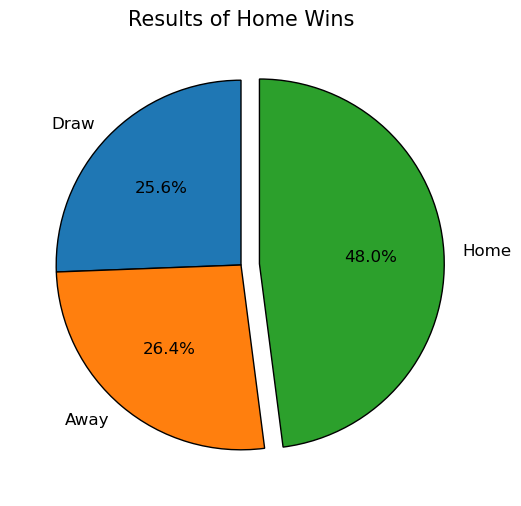

In [87]:
# plot the pie chart
plt.rcParams['font.size'] = 12
plt.figure(figsize = (10,6))
plt.pie(result_df, labels = ["Draw", "Away", "Home"], autopct = '%1.1f%%', startangle = 90, explode = (0, 0, 0.1),
            wedgeprops = {'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title("Results of Home Wins", fontsize = '15')

## Encoding

In [88]:
ord_encoder = OrdinalEncoder()
football_class[['Result', 'HTResult']] = ord_encoder.fit_transform(football_class[['Result', 'HTResult']])  # Encode target (Win=0, Draw=1, Loss=2)
football_class[['Result', 'HTResult']]

,Result,HTResult
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,2.0,1.0
5,0.0,0.0
...,...,...
3794,1.0,1.0
3795,2.0,2.0
3796,0.0,0.0
3797,1.0,2.0


In [89]:
# Label encoding
categorical_columns = ['HomeTeam', 'Referee']  # Replace with your actual categorical feature names

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    football_class[col] = le.fit_transform(football_class[col])
    label_encoders[col] = le 

## X and Y split

In [90]:
# x and y split
x = football_class.drop('Result', axis = 1)  # Features
y = football_class['Result']  # Target variable
x.shape, y.shape

((3355, 13), (3355,))

In [91]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)

## Data Scaling

In [92]:
x_numerical = x.select_dtypes(include = ['int32', 'float64']).columns

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train[x_numerical])
x_test_scaled = scaler.transform(x_test[x_numerical])


# x_train[x_numerical] = scaler.fit_transform(x_train[x_numerical])
# x_test[x_numerical] = scaler.transform(x_test[x_numerical])

# x_train_scaled = x_train.copy()
# x_test_scaled = x_test.copy()

# x_train_scaled[x_numerical] = scaler.fit_transform(x_train[x_numerical])
# x_test_scaled[x_numerical] = scaler.transform(x_test[x_numerical])


## Logistic Regression


In [93]:
# create the Log model
log_model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 0.1) # multinomial as we have three potential output
log_model.fit(x_train_scaled, y_train)

LogisticRegression(C=0.1, multi_class='multinomial')

In [95]:
# Log Reg performance
y_pred = log_model.predict(x_test_scaled)

# accuracy of model
logReg_accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", logReg_accuracy)

# Confusion Matrix
logReg_cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:", logReg_cm)

# classification report
logReg_class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", logReg_class_report)

Model Accuracy: 0.8659384309831182

Confusion Matrix: [[241  24   1]
 [ 44 151  63]
 [  0   3 480]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.91      0.87       266
         1.0       0.85      0.59      0.69       258
         2.0       0.88      0.99      0.93       483

    accuracy                           0.87      1007
   macro avg       0.86      0.83      0.83      1007
weighted avg       0.86      0.87      0.86      1007



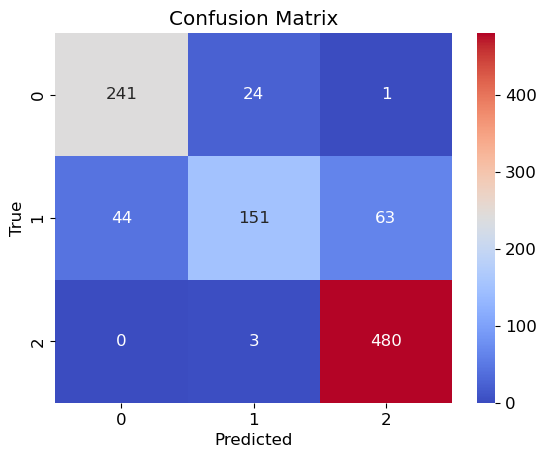

In [96]:
# Plot Confusion Matrix
sns.heatmap(logReg_cm, annot = True, fmt = "d", cmap = 'coolwarm')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

plt.show()

In [99]:
# Convert y_test to one-hot encoding for multiclass ROC
y_test_binarized = label_binarize(y_test, classes = [0, 1, 2])  # Adjust based on your classes

# Get predicted probabilities for each class
logReg_y_score = log_model.predict_proba(x_test_scaled)

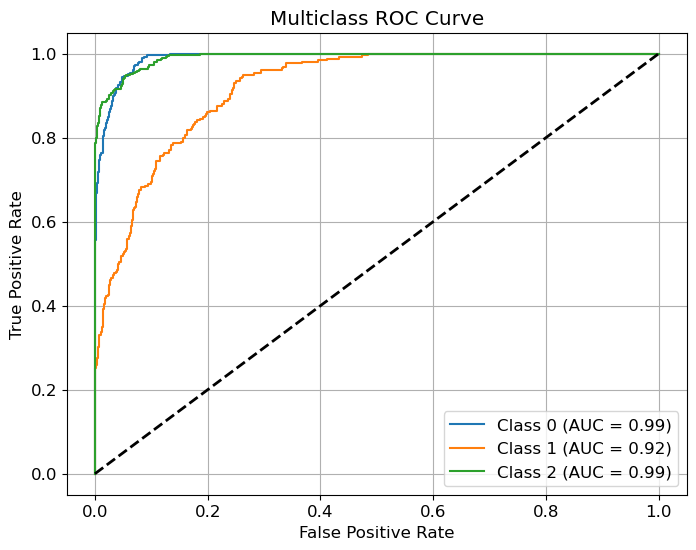

In [100]:
# Plot ROC Curve for each class
plt.figure(figsize = (8, 6))
for i in range(3):  # Since you have 3 classes (Win=0, Draw=1, Loss=2)
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], logReg_y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = f'Class {i} (AUC = {roc_auc:.2f})')

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [101]:
# store the values into a df for comparison with other models
classification_metrics = pd.DataFrame(columns = ['Model', 'Accuracy', 'ROC', 'F1-Score'])

logReg_precision = precision_score(y_test, y_pred, average = 'weighted')
logReg_f1 = f1_score(y_test, y_pred, average = 'weighted')
logReg_auc = roc_auc_score(y_test, logReg_y_score, average = 'weighted', multi_class = 'ovr')

# add the LogReg into the comparison df
logReg_metrics = pd.DataFrame({'Model': ['Logistic Regression'], 'Accuracy': [logReg_accuracy], 'ROC': [logReg_auc], 'F1-Score': [logReg_f1]})
classification_metrics = pd.concat([classification_metrics, logReg_metrics], ignore_index=True)
classification_metrics

,Model,Accuracy,ROC,F1-Score
0,Logistic Regression,0.865938,0.972844,0.856888


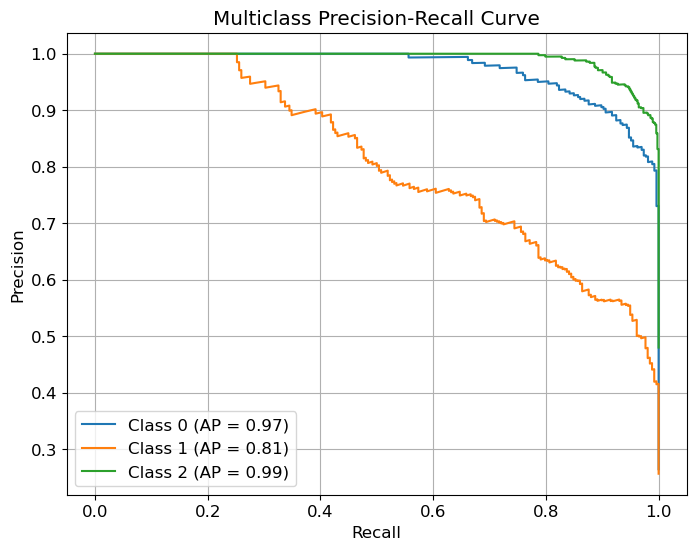

In [104]:
# plotting of PRC
plt.figure(figsize = (8, 6))
for i in range(3):  # Since you have 3 classes (Win=0, Draw=1, Loss=2)
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], logReg_y_score[:, i])
    avg_precision = average_precision_score(y_test_binarized[:, i], logReg_y_score[:, i])
    
    plt.plot(recall, precision, label = f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve')
plt.legend(loc = 'best')

plt.grid()
plt.show()

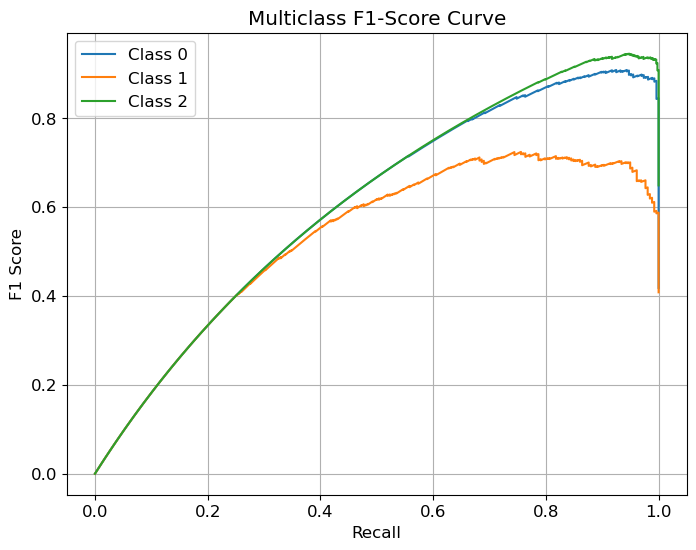

In [110]:
# Plot F1-score
plt.figure(figsize = (8, 6))

for i in range(3):  # Since you have 3 classes (Win=0, Draw=1, Loss=2)
    precision, recall, thresholds = precision_recall_curve(y_test_binarized[:, i], logReg_y_score[:, i])
    
    # Compute F1 score at each threshold
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid division by zero
    
    # Plot Recall vs F1-score
    plt.plot(recall, f1_scores, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('F1 Score')
plt.title('Multiclass F1-Score Curve')
plt.legend(loc = 'best')

plt.grid()
plt.show()

# SVM

In [111]:
# Create the SVM model
svm_model = SVC(kernel = 'linear', decision_function_shape = 'ovr', C = 0.1, probability = True)  # Linear kernel for multiclass classification

# Train the model on the scaled training data
svm_model.fit(x_train_scaled, y_train)

SVC(C=0.1, kernel='linear', probability=True)

In [112]:
# SVM peformance
y_pred_svm = svm_model.predict(x_test_scaled)

# Evaluate the model using accuracy score
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Model Accuracy: {svm_accuracy:.4f}")

# Confusion matrix
svm_cm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix:")
print(svm_cm)

# Classification report
svm_class_report = classification_report(y_test, y_pred_svm)
print("\nClassification Report:\n", svm_class_report)


Model Accuracy: 0.9553

Confusion Matrix:
[[242  24   0]
 [  7 248   3]
 [  0  11 472]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.91      0.94       266
         1.0       0.88      0.96      0.92       258
         2.0       0.99      0.98      0.99       483

    accuracy                           0.96      1007
   macro avg       0.95      0.95      0.95      1007
weighted avg       0.96      0.96      0.96      1007



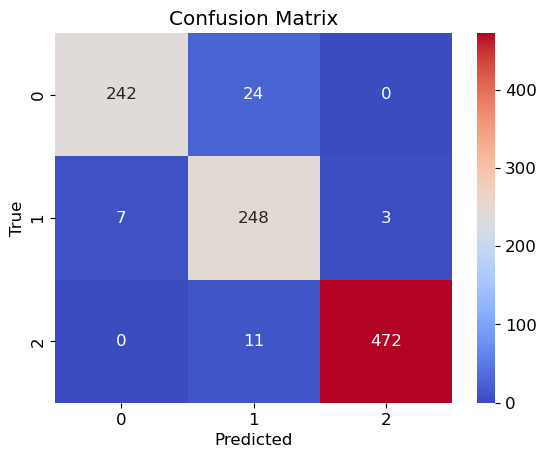

In [113]:
# Plot Confusion Matrix
sns.heatmap(svm_cm, annot = True, fmt = "d", cmap = 'coolwarm')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

plt.show()

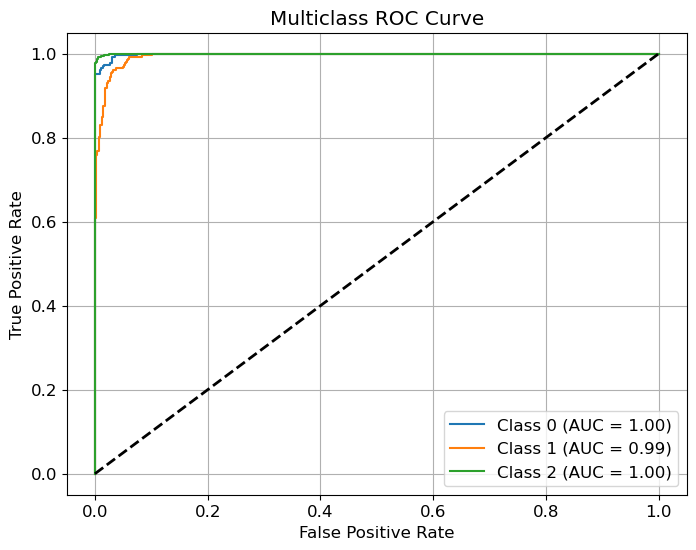

In [115]:
y_test_binarized_svm = label_binarize(y_test, classes = [0, 1, 2])  # Adjust based on your classes

svm_y_score = svm_model.predict_proba(x_test_scaled)

# Plot ROC Curve for each class
plt.figure(figsize = (8, 6))
for i in range(3):  # Since you have 3 classes (Win=0, Draw=1, Loss=2)
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], svm_y_score[:, i])
    roc_auc_svm = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = f'Class {i} (AUC = {roc_auc_svm:.2f})')

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', lw = 2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc = 'lower right')

plt.grid()
plt.show()

In [116]:
svm_precision = precision_score(y_test, y_pred_svm, average = 'weighted')
svm_auc = roc_auc_score(y_test, svm_y_score, average = 'weighted', multi_class = 'ovr')
svm_f1 = f1_score(y_test, y_pred_svm, average = 'weighted')

# Store the svm to the comparison df
svm_metrics = pd.DataFrame({'Model': ['Support Vector Machine'], 'Accuracy': [svm_accuracy], 'ROC': [svm_auc], 'F1-Score': [svm_f1]})
classification_metrics = pd.concat([classification_metrics, svm_metrics], ignore_index=True)
classification_metrics

,Model,Accuracy,ROC,F1-Score
0,Logistic Regression,0.865938,0.972844,0.856888
1,Support Vector Machine,0.955313,0.998136,0.955779


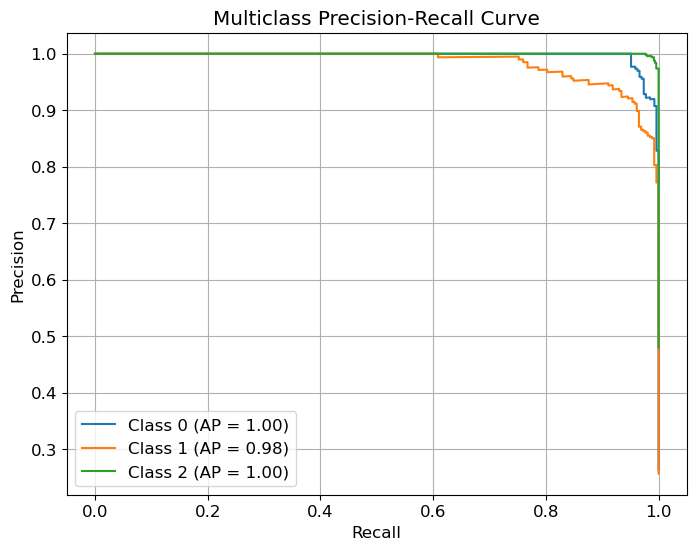

In [122]:
# plot PRC curve
plt.figure(figsize = (8, 6))

# Loop through each class (Win=0, Draw=1, Loss=2)
for i in range(3):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], svm_y_score[:, i])
    pr_auc = average_precision_score(y_test_binarized_svm[:, i], svm_y_score[:, i])
    
    plt.plot(recall, precision, label = f'Class {i} (AP = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve')
plt.legend(loc='lower left')

plt.grid()
plt.show()

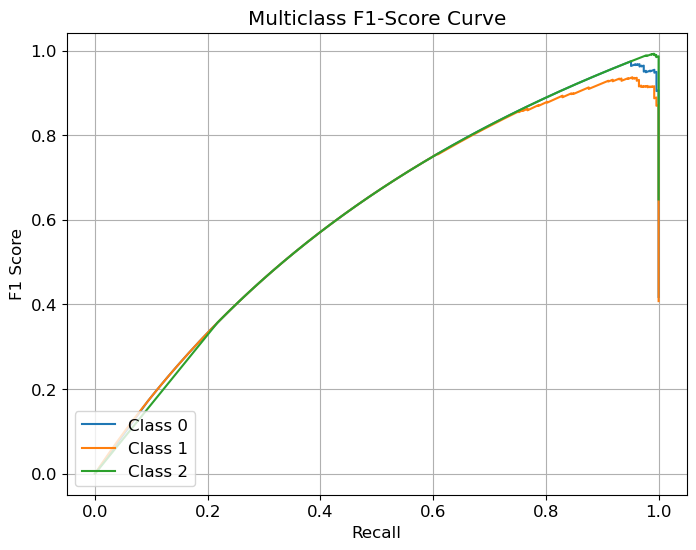

In [125]:
# Plot the F1-score 
plt.figure(figsize = (8, 6))

for i in range(3):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], svm_y_score[:, i])
    
    # Compute F1 score at each threshold
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10) 
    
    # Plot Recall vs F1-score
    plt.plot(recall, f1_scores, label = f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('F1 Score')
plt.title('Multiclass F1-Score Curve')
plt.legend(loc = 'lower left')

plt.grid()
plt.show()

# Random Forest

In [126]:
# Create the random forest model
rf = RandomForestClassifier(n_estimators = 100, oob_score = True, max_depth = 10, min_samples_split = 5, min_samples_leaf = 3, random_state = 42)
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=5,
                       oob_score=True, random_state=42)

In [127]:
# Random Forest performance
y_pred_rf = rf.predict(x_test_scaled)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {rf_accuracy:.4f}')

# Confusion matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(rf_cm)

# Classification report
rf_class_report = classification_report(y_test, y_pred_rf)
print("\nClassification Report:\n", rf_class_report)

Accuracy: 0.9970

Confusion Matrix:
[[265   1   0]
 [  0 256   2]
 [  0   0 483]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       266
         1.0       1.00      0.99      0.99       258
         2.0       1.00      1.00      1.00       483

    accuracy                           1.00      1007
   macro avg       1.00      1.00      1.00      1007
weighted avg       1.00      1.00      1.00      1007



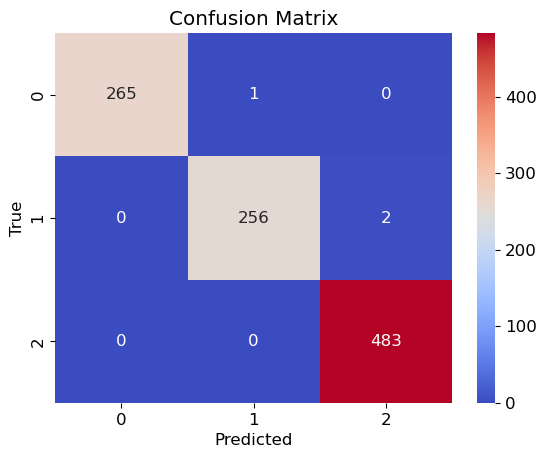

In [128]:
# Plot Confusion Matrix
sns.heatmap(rf_cm, annot = True, fmt = "d", cmap = 'coolwarm')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

plt.show()

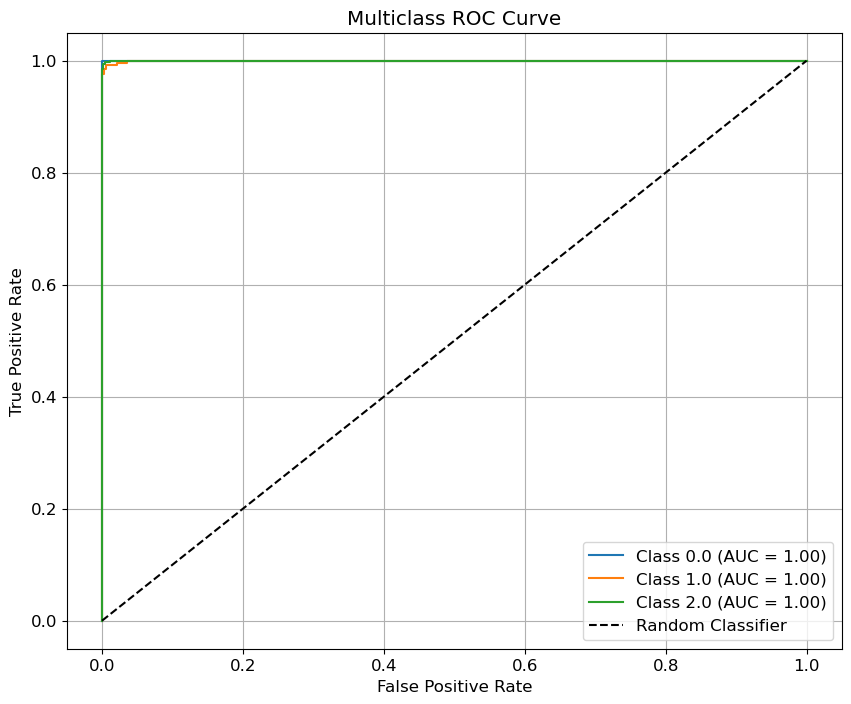

In [130]:
# Binarize the target labels (converts multiclass to binary)
y_test_bin = label_binarize(y_test, classes = rf.classes_)

# Get predicted probabilities for each class
rf_y_score = rf.predict_proba(x_test_scaled)

# Plot the ROC curve
plt.figure(figsize = (10, 8))

for i in range(len(rf.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], rf_y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = f'Class {rf.classes_[i]} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', label = 'Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')

plt.grid()
plt.show()

In [131]:
rf_precision = precision_score(y_test, y_pred_rf, average = 'weighted')
rf_auc = roc_auc_score(y_test, rf_y_score, average = 'weighted', multi_class = 'ovr')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

# Store the Rf results into the comparison df
rf_metrics = pd.DataFrame({'Model': ['Random Forest'], 'Accuracy': [rf_accuracy], 'ROC': [rf_auc], 'F1-Score': [rf_f1]})
classification_metrics = pd.concat([classification_metrics, rf_metrics], ignore_index=True)
classification_metrics

,Model,Accuracy,ROC,F1-Score
0,Logistic Regression,0.865938,0.972844,0.856888
1,Support Vector Machine,0.955313,0.998136,0.955779
2,Random Forest,0.997021,0.999901,0.997019


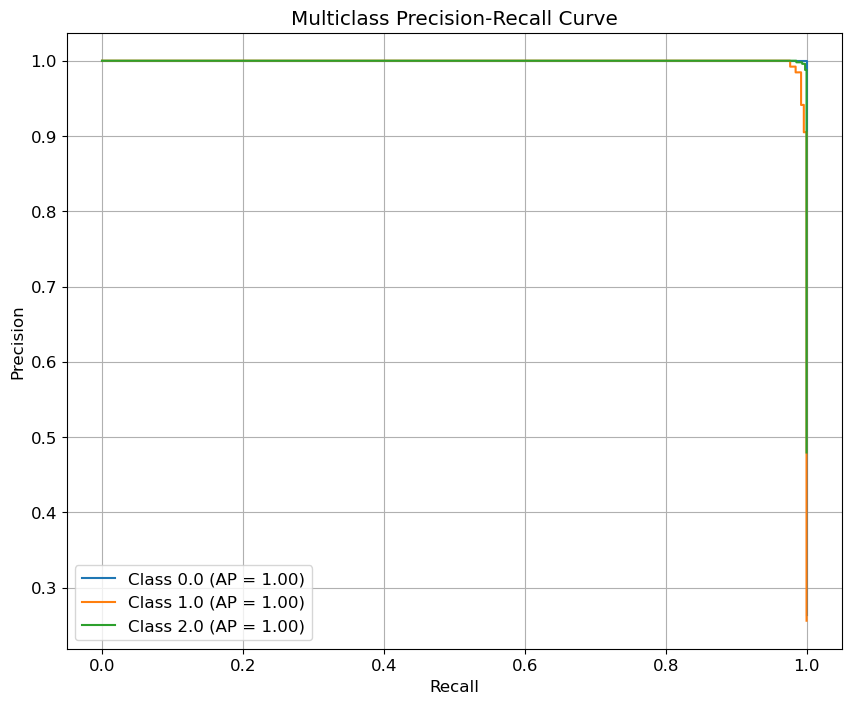

In [134]:
# PLot the PRC curve
plt.figure(figsize = (10, 8))

for i in range(len(rf.classes_)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], rf_y_score[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], rf_y_score[:, i])
    plt.plot(recall, precision, label = f'Class {rf.classes_[i]} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve')
plt.legend(loc = 'lower left')

plt.grid()
plt.show()

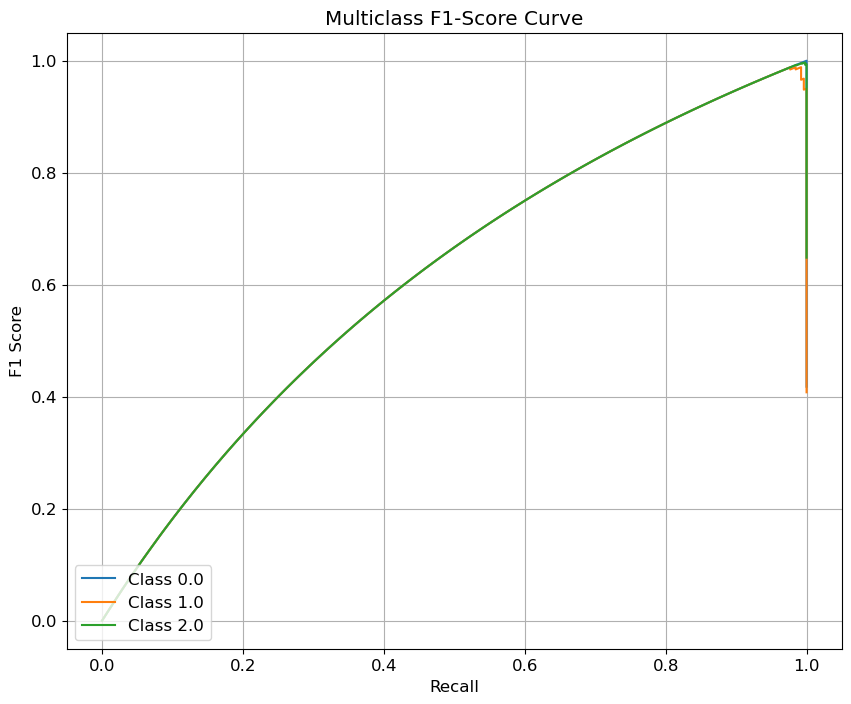

In [137]:
# Plot the f1-score
plt.figure(figsize = (10, 8))

for i in range(len(rf.classes_)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], rf_y_score[:, i])
    
    # Compute F1 score at each threshold
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid division by zero
    
    # Plot Recall vs F1-score
    plt.plot(recall, f1_scores, label = f'Class {rf.classes_[i]}')

plt.xlabel('Recall')
plt.ylabel('F1 Score')
plt.title('Multiclass F1-Score Curve')
plt.legend(loc = 'lower left')

plt.grid()
plt.show()

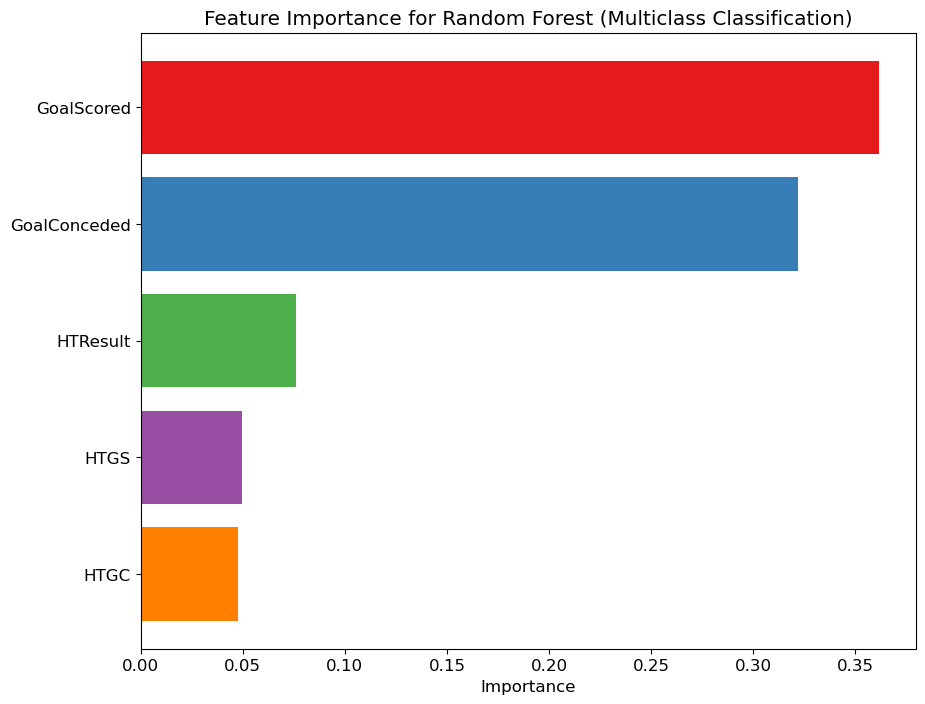

In [139]:
# feature Importance
importances = rf.feature_importances_

# to store the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

top5_rf = feature_importance_df.head(5)
colors = sns.color_palette("Set1", n_colors = top5_rf.shape[0])

# plot the feature importance as a bar chart
plt.figure(figsize = (10, 8))
bars = plt.barh(top5_rf['Feature'], top5_rf['Importance'], color = colors)
plt.xlabel('Importance')
plt.title('Feature Importance for Random Forest (Multiclass Classification)')
plt.gca().invert_yaxis()

plt.show()

In [140]:
feature_importance_df.head(5)

,Feature,Importance
0,GoalScored,0.361358
1,GoalConceded,0.321854
11,HTResult,0.075945
2,HTGS,0.049776
3,HTGC,0.047714


## Supervised Learning - Regression

### Dataset taken from:
https://www.kaggle.com/datasets/oles04/top-leagues-player

## Exploratory Data Analysis (EDA)

In [164]:
# create a player_df to store the csv
player_df = pd.DataFrame()

player_df = pd.read_csv('player.csv')
player_df

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,0,Ederson,NaN,29,1.88,Brazil Portugal,Osasco (SP),45.00,70.00,Goalkeeper,31,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,1,Stefan Ortega,Stefan Ortega Moreno,30,1.85,Germany Spain,Hofgeismar,6.00,6.00,Goalkeeper,18,right,Man City,2025-06-30,2022-07-01,neblung ...,NaN,EPL
2,2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.00,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.00,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.00,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,2607,Moussa Djitté,Moussa Kalilou Djitté,23,1.80,Senegal,Diattouma,2.00,2.00,Attack - Centre-Forward,28,right,AC Ajaccio,2023-06-30,2023-01-31,FS Management,NaN,Other
2608,2608,Mounaïm El Idrissy,منعم الإدريسي,24,1.81,France Morocco,Martigues,1.80,1.80,Attack - Centre-Forward,7,right,AC Ajaccio,2023-06-30,2019-07-01,N.Agency,NaN,Other
2609,2609,Moussa Soumano,NaN,17,NaN,France Mali,NaN,0.90,0.90,Attack - Centre-Forward,34,NaN,AC Ajaccio,2026-06-30,2023-01-01,NaN,NaN,Other
2610,2610,Romain Hamouma,NaN,36,1.79,France Algeria,Montbéliard,0.60,7.00,Attack - Centre-Forward,17,right,AC Ajaccio,2023-06-30,2022-07-01,Gallea Gestion S.A,NaN,Other


In [165]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2612 non-null   int64  
 1   name              2612 non-null   object 
 2   full_name         1480 non-null   object 
 3   age               2612 non-null   int64  
 4   height            2601 non-null   float64
 5   nationality       2612 non-null   object 
 6   place_of_birth    2595 non-null   object 
 7   price             2602 non-null   float64
 8   max_price         2606 non-null   float64
 9   position          2612 non-null   object 
 10  shirt_nr          2612 non-null   int64  
 11  foot              2576 non-null   object 
 12  club              2612 non-null   object 
 13  contract_expires  2544 non-null   object 
 14  joined_club       2612 non-null   object 
 15  player_agent      2353 non-null   object 
 16  outfitter         1003 non-null   object 


In [166]:
player_df.drop('Unnamed: 0', axis = 1, inplace = True) # this row has no purposes so drop
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2612 non-null   object 
 1   full_name         1480 non-null   object 
 2   age               2612 non-null   int64  
 3   height            2601 non-null   float64
 4   nationality       2612 non-null   object 
 5   place_of_birth    2595 non-null   object 
 6   price             2602 non-null   float64
 7   max_price         2606 non-null   float64
 8   position          2612 non-null   object 
 9   shirt_nr          2612 non-null   int64  
 10  foot              2576 non-null   object 
 11  club              2612 non-null   object 
 12  contract_expires  2544 non-null   object 
 13  joined_club       2612 non-null   object 
 14  player_agent      2353 non-null   object 
 15  outfitter         1003 non-null   object 
 16  league            2612 non-null   object 


In [167]:
player_df.head()

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,Ederson,NaN,29,1.88,Brazil Portugal,Osasco (SP),45.00,70.0,Goalkeeper,31,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,Stefan Ortega,Stefan Ortega Moreno,30,1.85,Germany Spain,Hofgeismar,6.00,6.0,Goalkeeper,18,right,Man City,2025-06-30,2022-07-01,neblung ...,NaN,EPL
2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.0,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.0,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.0,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL


In [168]:
player_df.tail()

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
2607,Moussa Djitté,Moussa Kalilou Djitté,23,1.80,Senegal,Diattouma,2.0,2.00,Attack - Centre-Forward,28,right,AC Ajaccio,2023-06-30,2023-01-31,FS Management,NaN,Other
2608,Mounaïm El Idrissy,منعم الإدريسي,24,1.81,France Morocco,Martigues,1.8,1.80,Attack - Centre-Forward,7,right,AC Ajaccio,2023-06-30,2019-07-01,N.Agency,NaN,Other
2609,Moussa Soumano,NaN,17,NaN,France Mali,NaN,0.9,0.90,Attack - Centre-Forward,34,NaN,AC Ajaccio,2026-06-30,2023-01-01,NaN,NaN,Other
2610,Romain Hamouma,NaN,36,1.79,France Algeria,Montbéliard,0.6,7.00,Attack - Centre-Forward,17,right,AC Ajaccio,2023-06-30,2022-07-01,Gallea Gestion S.A,NaN,Other
2611,Yoann Touzghar,NaN,36,1.80,Tunisia France,Avignon,0.5,1.75,Attack - Centre-Forward,9,right,AC Ajaccio,2024-06-30,2022-08-24,AGJ SP MGMT,NaN,Other


In [169]:
player_df.describe()

,age,height,price,max_price,shirt_nr
count,2612.000000,2601.000000,2602.000000,2606.000000,2612.000000
mean,26.305513,1.830892,10.650711,17.304729,20.495789
std,4.645297,0.067255,15.773271,21.948577,17.914206
min,17.000000,1.630000,0.025000,0.025000,1.000000
25%,23.000000,1.780000,1.800000,3.500000,8.000000
50%,26.000000,1.830000,4.500000,10.000000,17.000000
75%,30.000000,1.880000,13.000000,22.000000,27.000000
max,42.000000,2.060000,180.000000,200.000000,99.000000


In [170]:
player_df.describe(include = ['object'])

,name,full_name,nationality,place_of_birth,position,foot,club,contract_expires,joined_club,player_agent,outfitter,league
count,2612,1480,2612,2595,2612,2576,2612,2544,2612,2353,1003,2612
unique,2607,1480,423,1510,14,3,118,11,553,691,14,6
top,João Moutinho,Stefan Ortega Moreno,Spain,London,Defender - Centre-Back,right,Nottm Forest,2023-06-30,2022-07-01,Wasserman,Nike,Bundesliga
freq,2,1,311,57,468,1811,34,634,362,104,428,499


In [171]:
player_df.nunique()

name                2607
full_name           1480
age                   26
height                41
nationality          423
place_of_birth      1510
price                 93
max_price            105
position              14
shirt_nr              88
foot                   3
club                 118
contract_expires      11
joined_club          553
player_agent         691
outfitter             14
league                 6
dtype: int64

In [172]:
# identify the top 20 player in terms of price
top_20_players = player_df.sort_values(by='price', ascending = False).head(20)
top_20_players = top_20_players.reset_index(drop = True)
top_20_players

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,Kylian Mbappé,Kylian Mbappé Lottin,24,1.78,France Cameroon,Bondy,180.0,200.0,Attack - Centre-Forward,7,right,Paris SG,2025-06-30,2018-07-01,Relatives,Nike,Ligue1
1,Erling Haaland,Erling Braut Håland,22,1.95,Norway,Leeds,170.0,170.0,Attack - Centre-Forward,9,left,Man City,2027-06-30,2022-07-01,Rafaela Pimenta,Nike,EPL
2,Jude Bellingham,Jude Victor William Bellingham,19,1.86,England,Stourbridge,120.0,120.0,midfield - Central Midfield,22,right,Bor. Dortmund,2025-06-30,2020-07-23,NaN,adidas,Bundesliga
3,Vinicius Junior,NaN,22,1.76,Brazil Spain,São Gonçalo,120.0,120.0,Attack - Left Winger,20,right,Real Madrid,2024-06-30,2018-07-12,TFM Agency,Nike,LaLiga
4,Phil Foden,Philip Walter Foden,22,1.71,England,Stockport,110.0,110.0,Attack - Left Winger,47,left,Man City,2027-06-30,2017-07-01,NaN,Nike,EPL
5,Bukayo Saka,NaN,21,1.78,England Nigeria,London,110.0,110.0,Attack - Right Winger,7,left,Arsenal,2024-06-30,2019-07-01,Elite Project Group ...,New Balance,EPL
6,Jamal Musiala,NaN,20,1.84,Germany England,Stuttgart,110.0,110.0,midfield - Attacking Midfield,42,right,Bayern Munich,2026-06-30,2020-07-01,11WINS,NaN,Bundesliga
7,Federico Valverde,Federico Santiago Valverde Dipetta,24,1.82,Uruguay Spain,Montevideo,100.0,100.0,midfield - Central Midfield,15,right,Real Madrid,2027-06-30,2018-07-01,Wasserman,NaN,LaLiga
8,Pedri,NaN,20,1.74,Spain,Tegueste,100.0,100.0,midfield - Central Midfield,8,right,Barcelona,2026-06-30,2019-09-02,LEADERBROCK,adidas,LaLiga
9,Victor Osimhen,Victor James Osimhen,24,1.86,Nigeria,Lagos,100.0,100.0,Attack - Centre-Forward,9,right,SSC Napoli,2025-06-30,2020-09-01,Roberto Calenda,NaN,Other


## Data Cleaning

In [173]:
player_df.duplicated().sum()

0

In [174]:
# remove features based on domain knowledge
player_clean = player_df.drop(['name', 'full_name', 'place_of_birth', 'shirt_nr', 'player_agent', 'outfitter', 'joined_club'], axis = 1)
player_clean # name and full_name is removed as they are unique identifier

,age,height,nationality,price,max_price,position,foot,club,contract_expires,league
0,29,1.88,Brazil Portugal,45.00,70.00,Goalkeeper,left,Man City,2026-06-30,EPL
1,30,1.85,Germany Spain,6.00,6.00,Goalkeeper,right,Man City,2025-06-30,EPL
2,37,1.88,England,0.25,6.00,Goalkeeper,right,Man City,2023-06-30,EPL
3,26,1.87,Portugal,75.00,75.00,Defender - Centre-Back,right,Man City,2027-06-30,EPL
4,28,1.80,Netherlands Cote d'Ivoire,35.00,40.00,Defender - Centre-Back,left,Man City,2025-06-30,EPL
...,...,...,...,...,...,...,...,...,...,...
2607,23,1.80,Senegal,2.00,2.00,Attack - Centre-Forward,right,AC Ajaccio,2023-06-30,Other
2608,24,1.81,France Morocco,1.80,1.80,Attack - Centre-Forward,right,AC Ajaccio,2023-06-30,Other
2609,17,NaN,France Mali,0.90,0.90,Attack - Centre-Forward,NaN,AC Ajaccio,2026-06-30,Other
2610,36,1.79,France Algeria,0.60,7.00,Attack - Centre-Forward,right,AC Ajaccio,2023-06-30,Other


In [175]:
player_clean.isnull().sum()

age                  0
height              11
nationality          0
price               10
max_price            6
position             0
foot                36
club                 0
contract_expires    68
league               0
dtype: int64

In [176]:
# change 'contract_expires' into datetime, get the year only and replace NaN values with the most repeated year
player_clean['contract_expires'] = pd.to_datetime(player_clean['contract_expires'], errors = 'coerce')
player_clean['contract_expires'] = player_clean['contract_expires'].dt.year

player_clean # repeated runs will cause the 'contract_expires' output become 1970.0 for the whole column

,age,height,nationality,price,max_price,position,foot,club,contract_expires,league
0,29,1.88,Brazil Portugal,45.00,70.00,Goalkeeper,left,Man City,2026.0,EPL
1,30,1.85,Germany Spain,6.00,6.00,Goalkeeper,right,Man City,2025.0,EPL
2,37,1.88,England,0.25,6.00,Goalkeeper,right,Man City,2023.0,EPL
3,26,1.87,Portugal,75.00,75.00,Defender - Centre-Back,right,Man City,2027.0,EPL
4,28,1.80,Netherlands Cote d'Ivoire,35.00,40.00,Defender - Centre-Back,left,Man City,2025.0,EPL
...,...,...,...,...,...,...,...,...,...,...
2607,23,1.80,Senegal,2.00,2.00,Attack - Centre-Forward,right,AC Ajaccio,2023.0,Other
2608,24,1.81,France Morocco,1.80,1.80,Attack - Centre-Forward,right,AC Ajaccio,2023.0,Other
2609,17,NaN,France Mali,0.90,0.90,Attack - Centre-Forward,NaN,AC Ajaccio,2026.0,Other
2610,36,1.79,France Algeria,0.60,7.00,Attack - Centre-Forward,right,AC Ajaccio,2023.0,Other


In [177]:
# replace NaN values with the most repeated year
mode_year = player_clean['contract_expires'].mode()[0]  # Get the most repeated year
player_clean['contract_expires'].fillna(mode_year, inplace=True)

# Convert to integer
player_clean['contract_expires'] = player_clean['contract_expires'].astype(int)

player_clean.isnull().sum()

age                  0
height              11
nationality          0
price               10
max_price            6
position             0
foot                36
club                 0
contract_expires     0
league               0
dtype: int64

In [178]:
player_clean['contract_expires'].unique() # Check for the values of contract_expires

array([2026, 2025, 2023, 2027, 2024, 2028, 2029, 2030, 2031, 2032])

In [179]:
# change contract_expires to number of years left before contract expires
player_clean['years_left'] = player_clean['contract_expires'] - 2022

# Remove contract_expires
player_clean = player_clean.drop(columns = ['contract_expires'])

player_clean

,age,height,nationality,price,max_price,position,foot,club,league,years_left
0,29,1.88,Brazil Portugal,45.00,70.00,Goalkeeper,left,Man City,EPL,4
1,30,1.85,Germany Spain,6.00,6.00,Goalkeeper,right,Man City,EPL,3
2,37,1.88,England,0.25,6.00,Goalkeeper,right,Man City,EPL,1
3,26,1.87,Portugal,75.00,75.00,Defender - Centre-Back,right,Man City,EPL,5
4,28,1.80,Netherlands Cote d'Ivoire,35.00,40.00,Defender - Centre-Back,left,Man City,EPL,3
...,...,...,...,...,...,...,...,...,...,...
2607,23,1.80,Senegal,2.00,2.00,Attack - Centre-Forward,right,AC Ajaccio,Other,1
2608,24,1.81,France Morocco,1.80,1.80,Attack - Centre-Forward,right,AC Ajaccio,Other,1
2609,17,NaN,France Mali,0.90,0.90,Attack - Centre-Forward,NaN,AC Ajaccio,Other,4
2610,36,1.79,France Algeria,0.60,7.00,Attack - Centre-Forward,right,AC Ajaccio,Other,1


In [180]:
# fill the na of these columns with the mean
player_numerical_col = ['height', 'price', 'max_price']

player_clean[player_numerical_col] = player_clean[player_numerical_col].fillna(player_clean[player_numerical_col].mean())

player_clean.isnull().sum()

age             0
height          0
nationality     0
price           0
max_price       0
position        0
foot           36
club            0
league          0
years_left      0
dtype: int64

### Remove outliers

In [182]:
# select all numerical data to remove the outliers
players_numerical = player_clean.select_dtypes(include = np.number)

numerical_cols = ['age', 'height', 'price', 'max_price']

for col in numerical_cols:
    Q1 = players_numerical[col].quantile(0.25)
    Q3 = players_numerical[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    players_numerical = players_numerical[(players_numerical[col] >= lower_bound) & (players_numerical[col] <= upper_bound)]

players_numerical.nunique()

age           24
height        40
price         72
max_price     85
years_left     9
dtype: int64

In [183]:
players_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2264 entries, 1 to 2611
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         2264 non-null   int64  
 1   height      2264 non-null   float64
 2   price       2264 non-null   float64
 3   max_price   2264 non-null   float64
 4   years_left  2264 non-null   int32  
dtypes: float64(3), int32(1), int64(1)
memory usage: 97.3 KB


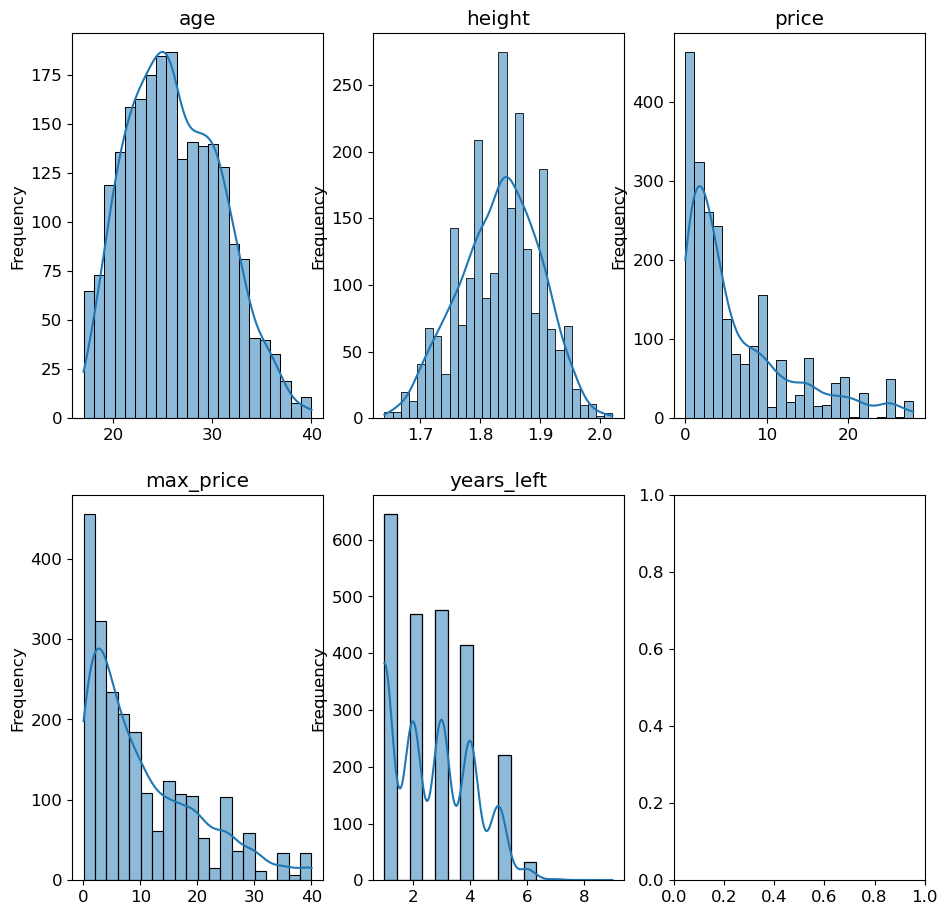

In [185]:
# plot distribution and kde plot
fig, axes = plt.subplots(2, 3, figsize = (11, 11))

axes = axes.flatten()

for i, col in enumerate(players_numerical):
    sns.histplot(players_numerical[col], kde = True, ax = axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

In [186]:
# correlation
players_corr = players_numerical.corr().round(3)
players_corr

,age,height,price,max_price,years_left
age,1.000,0.061,-0.146,0.207,-0.357
height,0.061,1.000,-0.072,-0.071,-0.006
price,-0.146,-0.072,1.000,0.727,0.315
max_price,0.207,-0.071,0.727,1.000,0.065
years_left,-0.357,-0.006,0.315,0.065,1.000


Text(0.5, 1.0, 'Correlation Matrix')

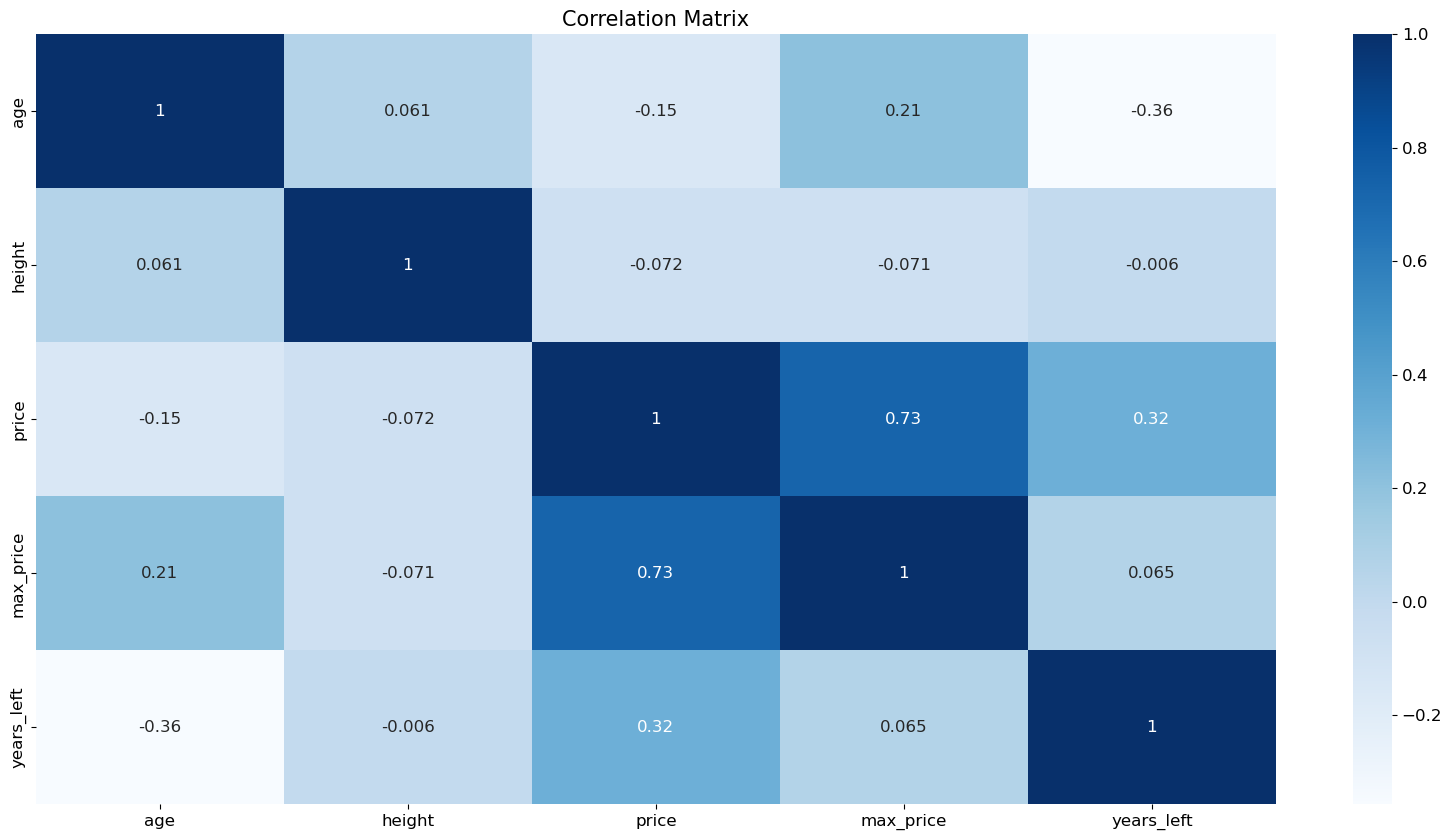

In [187]:
# Plot the correlation matrix
corr_matrix = plt.figure(figsize = (20, 10))
sns.heatmap(players_corr, annot = True, cmap = 'Blues')
plt.title("Correlation Matrix", fontsize = '15')

In [189]:
# Get the absolute correlation values for the 'price' feature
price_corr = players_corr['price'].abs()

# Sort the correlation values from highest to lowest
sorted_price_corr = price_corr.sort_values(ascending = False)

# Remove itself for the correlation
sorted_price_corr = sorted_price_corr[sorted_price_corr < 1.0]

sorted_price_corr

max_price     0.727
years_left    0.315
age           0.146
height        0.072
Name: price, dtype: float64

## Data Cleaning for Categorical Features

In [190]:
player_categorical = player_clean.select_dtypes(exclude = np.number)
player_categorical

,nationality,position,foot,club,league
0,Brazil Portugal,Goalkeeper,left,Man City,EPL
1,Germany Spain,Goalkeeper,right,Man City,EPL
2,England,Goalkeeper,right,Man City,EPL
3,Portugal,Defender - Centre-Back,right,Man City,EPL
4,Netherlands Cote d'Ivoire,Defender - Centre-Back,left,Man City,EPL
...,...,...,...,...,...
2607,Senegal,Attack - Centre-Forward,right,AC Ajaccio,Other
2608,France Morocco,Attack - Centre-Forward,right,AC Ajaccio,Other
2609,France Mali,Attack - Centre-Forward,NaN,AC Ajaccio,Other
2610,France Algeria,Attack - Centre-Forward,right,AC Ajaccio,Other


In [191]:
# replace NaN values in 'foot' with right as most players are right legged
player_categorical['foot'].fillna(player_categorical['foot'].mode()[0], inplace = True)
player_categorical['foot'].unique()

array(['left', 'right', 'both'], dtype=object)

In [192]:
# replace each specific position to only goalkeeper, defender, midfielder or forward
conditions = [
    player_categorical['position'].str.contains('Attack'),
    player_categorical['position'].str.contains('midfield', case = False),
    player_categorical['position'].str.contains('Defender'),
    player_categorical['position'].str.contains('Goalkeeper')
]

# Corresponding values for each condition
choices = ['Attacker', 'Midfielder', 'Defender', 'Goalkeeper']

player_categorical['position'] = np.select(conditions, choices, default = 'Unknown')

# Display the result
player_categorical['position'].unique() # re-running will cause Forward and Midfielder to be unknown

array(['Goalkeeper', 'Defender', 'Midfielder', 'Attacker'], dtype=object)

In [193]:
# Replace players with duo nationality to become the first nationality displaced
player_categorical['nationality'] = player_categorical['nationality'].str.split().str[0]
player_categorical

,nationality,position,foot,club,league
0,Brazil,Goalkeeper,left,Man City,EPL
1,Germany,Goalkeeper,right,Man City,EPL
2,England,Goalkeeper,right,Man City,EPL
3,Portugal,Defender,right,Man City,EPL
4,Netherlands,Defender,left,Man City,EPL
...,...,...,...,...,...
2607,Senegal,Attacker,right,AC Ajaccio,Other
2608,France,Attacker,right,AC Ajaccio,Other
2609,France,Attacker,right,AC Ajaccio,Other
2610,France,Attacker,right,AC Ajaccio,Other


In [194]:
# merge both cleaned df together
player_clean = players_numerical.merge(player_categorical, left_index = True, right_index = True)
player_clean

,age,height,price,max_price,years_left,nationality,position,foot,club,league
1,30,1.850000,6.00,6.00,3,Germany,Goalkeeper,right,Man City,EPL
2,37,1.880000,0.25,6.00,1,England,Goalkeeper,right,Man City,EPL
8,22,1.710000,15.00,15.00,4,Spain,Defender,left,Man City,EPL
11,18,1.690000,15.00,15.00,2,England,Defender,right,Man City,EPL
14,20,1.770000,10.00,10.00,6,Argentina,Midfielder,left,Man City,EPL
...,...,...,...,...,...,...,...,...,...,...
2607,23,1.800000,2.00,2.00,1,Senegal,Attacker,right,AC Ajaccio,Other
2608,24,1.810000,1.80,1.80,1,France,Attacker,right,AC Ajaccio,Other
2609,17,1.830892,0.90,0.90,4,France,Attacker,right,AC Ajaccio,Other
2610,36,1.790000,0.60,7.00,1,France,Attacker,right,AC Ajaccio,Other


In [195]:
player_clean.isnull().sum() # ensure player_clean has no Nan values after merging

age            0
height         0
price          0
max_price      0
years_left     0
nationality    0
position       0
foot           0
club           0
league         0
dtype: int64

In [196]:
player_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2264 entries, 1 to 2611
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          2264 non-null   int64  
 1   height       2264 non-null   float64
 2   price        2264 non-null   float64
 3   max_price    2264 non-null   float64
 4   years_left   2264 non-null   int32  
 5   nationality  2264 non-null   object 
 6   position     2264 non-null   object 
 7   foot         2264 non-null   object 
 8   club         2264 non-null   object 
 9   league       2264 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(5)
memory usage: 185.7+ KB


## X and Y split for Regression

In [197]:
# split features and target variable
x = player_clean.drop('price', axis = 1) # features
y = player_clean['price'] # target variable

In [199]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [200]:
# one hot encoding
ohe_col = ['nationality', 'club']
ordinal_col = ['position', 'foot', 'league'] # ordinal encoding
num_col = ['age', 'height', 'max_price', 'contract_expires']  # Numerical features


# All rankings are based on domain knowledge
position_order = ['Attacker', 'Midfielder', 'Defender', 'Goalkeeper'] # attackers naturally have the highest value
foot_order = ['both', 'left', 'right'] # both footed are rare, right footer are common
league_order = ['EPL', 'LaLiga', 'SerieA', 'Bundesliga', 'Ligue1', 'Other'] # top 5 leage ranking based on google statistics

ordinal_encoder = OrdinalEncoder(categories=[position_order, foot_order, league_order])

# preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), ['age', 'height', 'max_price', 'years_left']),  # Include your numerical features here
    ('cat_ohe', OneHotEncoder(handle_unknown = 'ignore'), ohe_col),
    ('cat_ordinal', ordinal_encoder, ordinal_col)  # Ordinal encoding for 'position', 'foot', and 'league'

])

x_train_processed = preprocessor.fit_transform(x_train)
x_test_processed = preprocessor.transform(x_test)
x_train_processed.shape

(1811, 223)

In [201]:
x_test_processed.shape

(453, 223)

## Linear Regression

In [214]:
# create the LR model
lr_model = LinearRegression()

lr_model.fit(x_train_processed, y_train)

lr_y_pred = lr_model.predict(x_test_processed)

lr_mae = mean_absolute_error(y_test, lr_y_pred).round(4)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_y_pred)).round(4)
lr_r2 = r2_score(y_test, lr_y_pred).round(4)

print(f"MAE: {lr_mae}, RMSE: {lr_rmse}, R2: {lr_r2}")

MAE: 3.0972, RMSE: 4.0329, R2: 0.6306


In [226]:
# Create a df to store the model comparison
model_metrics = pd.DataFrame(columns = ['Model', 'MAE', 'RMSE', 'R2'])
lr_metrics = pd.DataFrame({'Model': ['Linear Regression'], 'MAE': [lr_mae], 'RMSE': [lr_rmse], 'R2': [lr_r2]})

# store LR performance into the model
model_metrics = pd.concat([model_metrics, lr_metrics], ignore_index=True)
model_metrics

,Model,MAE,RMSE,R2
0,Linear Regression,3.0972,4.0329,0.6306


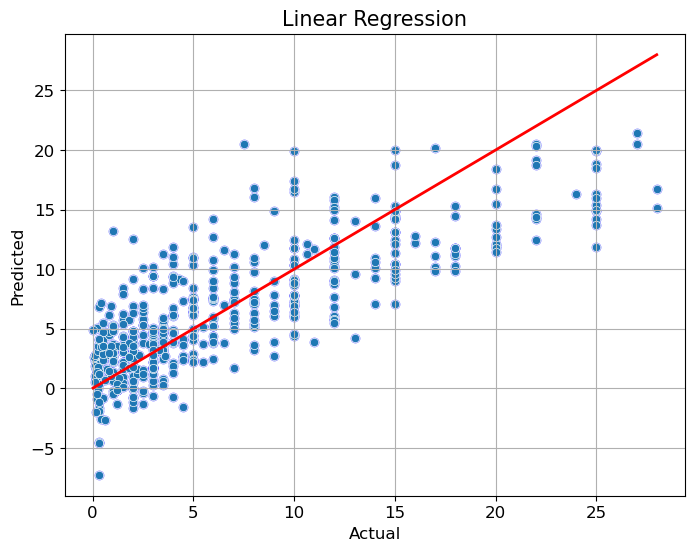

In [221]:
# Plot LR
plt.figure(figsize = (8, 6))

# Plot the line of best fit
min_val = min(y_test.min(), lr_y_pred.min())
max_val = max(y_test.max(), lr_y_pred.max())
plt.scatter(y_test, lr_y_pred, color = 'blue', alpha = 0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = "red", lw = 2)

# Plot the actual vs predicted values
sns.scatterplot(x = y_test, y = lr_y_pred)

plt.xlabel('Actual', fontsize = 12)
plt.ylabel('Predicted', fontsize = 12)
plt.title('Linear Regression', fontsize = 15)

plt.grid(True)
plt.show()

## Polynomial Regression

In [222]:
# Polynomial degree
degree = 3
poly = PolynomialFeatures(degree = degree)

x_train_poly = poly.fit_transform(x_train_processed)
x_test_poly = poly.transform(x_test_processed)

# Create 3rd degree polynomial model
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

# Make Predictions
poly_y_pred = poly_model.predict(x_test_poly)

# Evaluate Model
poly_mae = mean_absolute_error(y_test, poly_y_pred).round(4)
poly_rmse = np.sqrt(mean_squared_error(y_test, poly_y_pred)).round(4)
poly_r2 = r2_score(y_test, poly_y_pred).round(4)

print(f"Polynomial Regression (Degree {degree}) -> MAE: {poly_mae}, RMSE: {poly_rmse}, R2: {poly_r2}")

Polynomial Regression (Degree 3) -> MAE: 3.5059, RMSE: 4.917, R2: 0.4509


In [227]:
poly_metrics = pd.DataFrame({'Model': ['Polynomial Regression'], 'MAE': [poly_mae], 'RMSE': [poly_rmse], 'R2': [poly_r2]})

# store the poly performance into the comparison df
model_metrics = pd.concat([model_metrics, poly_metrics], ignore_index=True)
model_metrics

,Model,MAE,RMSE,R2
0,Linear Regression,3.0972,4.0329,0.6306
1,Polynomial Regression,3.5059,4.9170,0.4509


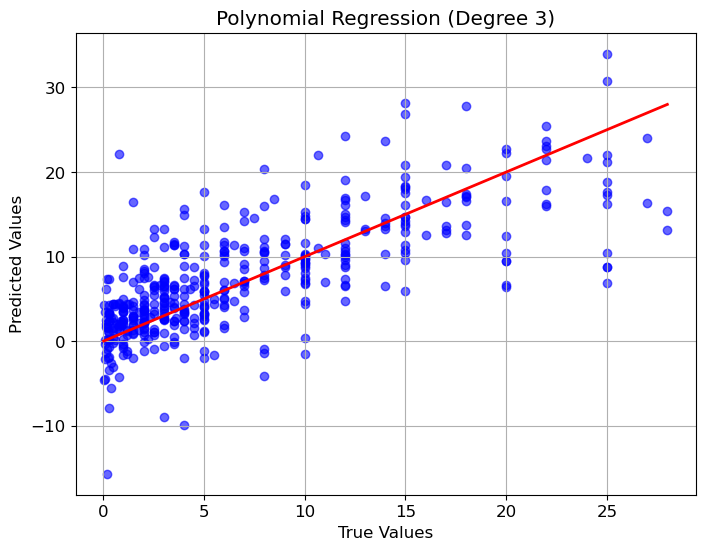

In [210]:
# plot the polynomial regression
plt.figure(figsize = (8, 6))
plt.scatter(y_test, poly_y_pred, color = 'blue', alpha = 0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', lw = 2)  # Line of equality
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Polynomial Regression (Degree {degree})')

plt.grid(True)
plt.show()

## Lasso regression

In [223]:
# Lasso Regression
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean = False)),  # Standardize features
    ('lasso', Lasso(alpha = 0.1, max_iter = 5000))  # Lasso Regression with regularization
])

lasso_pipeline.fit(x_train_processed, y_train)

# Make the predictions
y_pred_lasso = lasso_pipeline.predict(x_test_processed)

lasso_mae = mean_absolute_error(y_test, y_pred_lasso).round(4)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso)).round(4)
lasso_r2 = r2_score(y_test, y_pred_lasso).round(4)

print(f"Lasso Regression -> MAE: {lasso_mae}, RMSE: {lasso_rmse}, R2: {lasso_r2}")

Lasso Regression -> MAE: 2.973, RMSE: 3.9511, R2: 0.6454


In [228]:
lasso_metrics = pd.DataFrame({'Model': ['Lasso Regression'], 'MAE': [lasso_mae], 'RMSE': [lasso_rmse], 'R2': [lasso_r2]})

# Store the Lasso regression into the comparison df
model_metrics = pd.concat([model_metrics, lasso_metrics], ignore_index = True)
model_metrics

,Model,MAE,RMSE,R2
0,Linear Regression,3.0972,4.0329,0.6306
1,Polynomial Regression,3.5059,4.9170,0.4509
2,Lasso Regression,2.9730,3.9511,0.6454


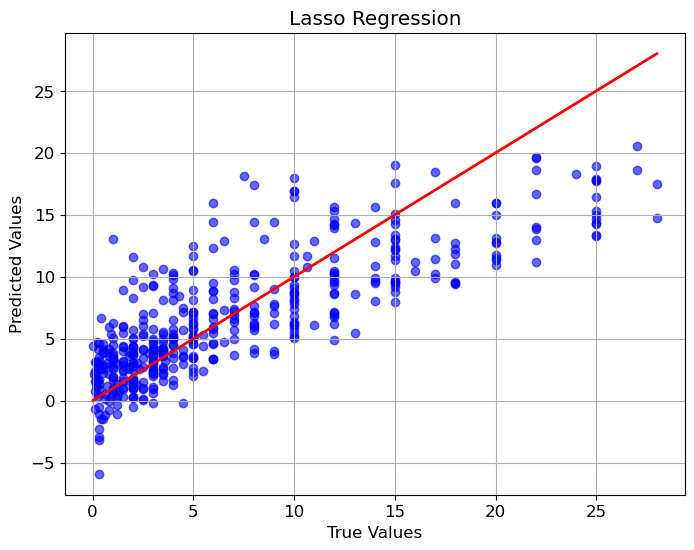

In [231]:
# plot the lasso regression
plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_pred_lasso, color = 'blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', lw = 2)  # Line of equality
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression')

plt.grid(True)
plt.show()

## Ridge Regression

In [232]:
# Ridge Regression
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean = False)), 
    ('ridge', Ridge(alpha = 1.0, max_iter = 5000))  
])

ridge_pipeline.fit(x_train_processed, y_train)

# Make predictions
y_pred_ridge = ridge_pipeline.predict(x_test_processed)

ridge_mae = mean_absolute_error(y_test, y_pred_ridge).round(4)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge)).round(4)
ridge_r2 = r2_score(y_test, y_pred_ridge).round(4)

print(f"Ridge Regression -> MAE: {ridge_mae}, RMSE: {ridge_rmse}, R2: {ridge_r2}")

Ridge Regression -> MAE: 3.099, RMSE: 4.034, R2: 0.6304


In [233]:
ridge_metrics = pd.DataFrame({'Model': ['Ridge Regression'], 'MAE': [ridge_mae], 'RMSE': [ridge_rmse], 'R2': [ridge_r2]})

# store the ridge regression into the comparison df
model_metrics = pd.concat([model_metrics, ridge_metrics], ignore_index=True)
model_metrics

,Model,MAE,RMSE,R2
0,Linear Regression,3.0972,4.0329,0.6306
1,Polynomial Regression,3.5059,4.9170,0.4509
2,Lasso Regression,2.9730,3.9511,0.6454
3,Ridge Regression,3.0990,4.0340,0.6304


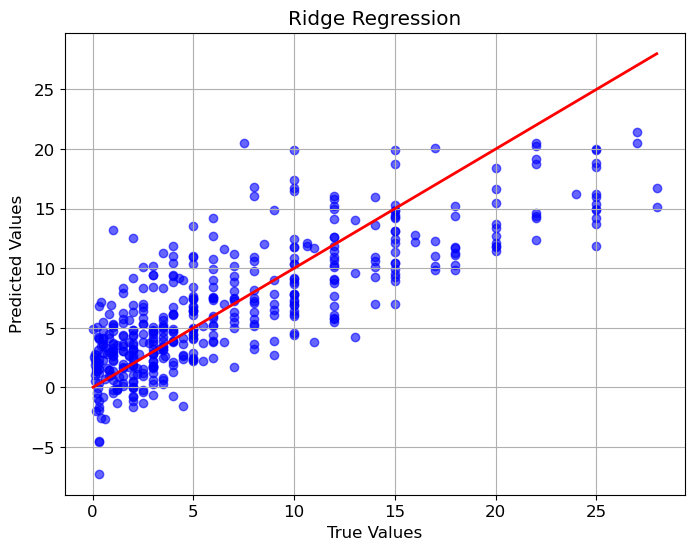

In [234]:
# plot the ridge regression model
plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_pred_ridge, color = 'blue', alpha = 0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', lw = 2)  # Line of equality
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression')

plt.grid(True)
plt.show()

## Random Forest

In [235]:
# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Train the model
rf_model.fit(x_train_processed, y_train)

rf_y_pred = rf_model.predict(x_test_processed)

In [236]:
rf_mae = mean_absolute_error(y_test, rf_y_pred).round(4)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred)).round(4)

rf_r2 = r2_score(y_test, rf_y_pred).round(4)

print(f"Random Forest -> MAE: {rf_mae}, RMSE: {rf_rmse}, R2: {rf_r2}")

Random Forest -> MAE: 2.0888, RMSE: 3.337, R2: 0.7471


In [237]:
rf_metrics = pd.DataFrame({'Model': ['Random Forest'], 'MAE': [rf_mae], 'RMSE': [rf_rmse], 'R2': [rf_r2]})

# store the random forest results into the comparison model
model_metrics = pd.concat([model_metrics, rf_metrics], ignore_index = True)
model_metrics

,Model,MAE,RMSE,R2
0,Linear Regression,3.0972,4.0329,0.6306
1,Polynomial Regression,3.5059,4.9170,0.4509
2,Lasso Regression,2.9730,3.9511,0.6454
3,Ridge Regression,3.0990,4.0340,0.6304
4,Random Forest,2.0888,3.3370,0.7471


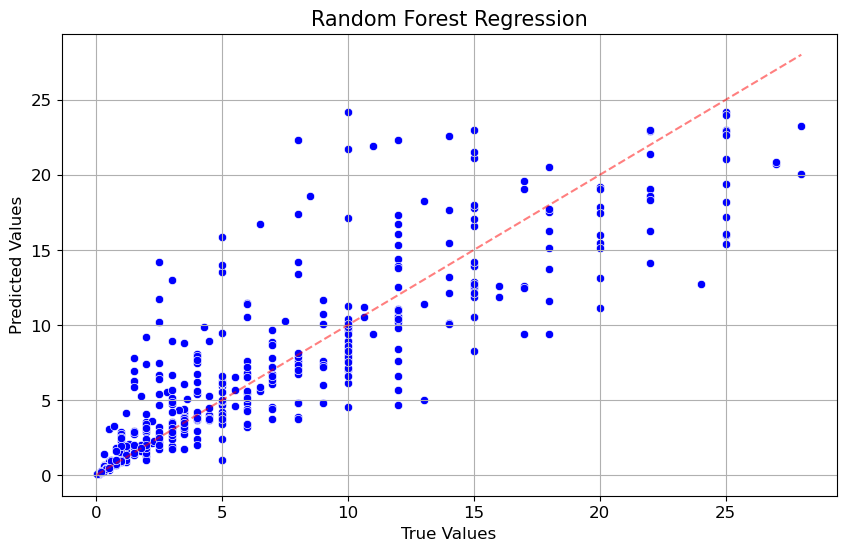

In [238]:
plt.figure(figsize = (10, 6))

min_val = min(y_test.min(), rf_y_pred.min())
max_val = max(y_test.max(), rf_y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], ls = "--", c = "red", alpha = 0.5)  # Line of best fit

# Plot the actual vs predicted values
sns.scatterplot(x = y_test, y = rf_y_pred, color = 'blue')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression', fontsize = 15)

plt.grid(True)
plt.show()

In [242]:
# Extract feature names from OneHotEncoder
ohe_feature_names = preprocessor.named_transformers_['cat_ohe'].get_feature_names_out(ohe_col)

# Combine all feature names
rf_feature_names = ['age', 'height', 'max_price', 'contract_expires'] + list(ohe_feature_names) + ordinal_col

x_train_dense = preprocessor.transform(x_train).toarray()  # Convert to dense array after preprocessing
x_test_dense = preprocessor.transform(x_test).toarray() 

# Convert to DataFrame
x_train_df = pd.DataFrame(x_train_dense, columns = rf_feature_names)
x_test_df = pd.DataFrame(x_test_dense, columns = rf_feature_names)

# Feature importace
rf_feature_importances = pd.DataFrame({
    'Feature': x_train_df.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by = 'Importance', ascending = False)

rf_feature_importances.head(5)

,Feature,Importance
2,max_price,0.605655
0,age,0.193981
3,contract_expires,0.038236
1,height,0.024916
222,league,0.016964


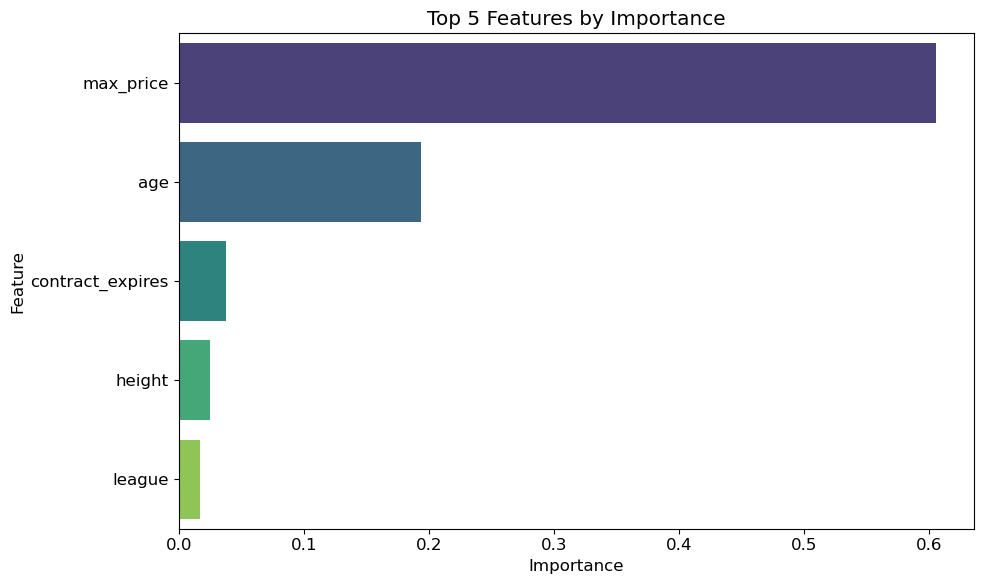

In [243]:
top_5_features = rf_feature_importances.sort_values(by = 'Importance', ascending = False).head(5)
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = top_5_features, palette = 'viridis')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Features by Importance')

plt.tight_layout()
plt.show()